# DATA PROCESSING

# Импорт необходимых модумей

In [1]:
import re
import os
import logging
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from openpyxl import Workbook
from openpyxl.drawing.image import Image
from datetime import datetime
from dateutil.relativedelta import relativedelta


# Загрузка данных

In [2]:
# Избавляемся от не нужных предупреждений
warnings.filterwarnings('ignore')

# Настройка логирования для отслеживания выполнения кода
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Устанавливание директории где храниться датасет
os.chdir("source") 

# Отображать все столбцы
pd.set_option('display.max_columns', None)

# Отображать все строки
pd.set_option('display.max_rows', None)


In [3]:
# # Загрузка данных из Excel
# data_loan = pd.read_excel("full_data.xlsx", sheet_name='ListPI1.csv')
# data_app = pd.read_excel("full_data.xlsx", sheet_name='ListP1.csv')
# data_beh = pd.read_excel("full_data.xlsx", sheet_name='ListB1.csv')

In [4]:
# Загрузка данных из CSV файлов
data_app = pd.read_csv('ListPI1.csv')
data_loan = pd.read_csv('ListP1.csv')
data_beh = pd.read_csv('ListB1.csv')


# Объединение данных по Account ID

In [5]:
logging.info("Объединение данных по 'Account ID'.")
res = data_loan.merge(data_app, on="Account ID", how="left", suffixes=('_loan', '_app'))
res = res.merge(data_beh, on="Account ID", how="left", suffixes=('', '_beh'))


2024-12-10 16:44:48,610 - INFO - Объединение данных по 'Account ID'.


# Преобразование названий столбцов в snake_case

In [6]:
logging.info("Просмотр название столбцов до преобразования")
for i, column in enumerate(res.columns.to_list()):
    print(f"{i} <=> {column}")

2024-12-10 16:44:49,691 - INFO - Просмотр название столбцов до преобразования


0 <=> Customer ID_loan
1 <=> Application ID_loan
2 <=> Account ID
3 <=> Branch ID
4 <=> Product ID
5 <=> Application date
6 <=> Date loan granted
7 <=> Loan Amount
8 <=> First instalment due date
9 <=> Interest rate
10 <=> Collateral type
11 <=> Value of collateral
12 <=> Property type/Collateral type
13 <=> Salary payment in bank account
14 <=> Loan type
15 <=> # of instalments
16 <=> Instalment amount/Min instalment amount
17 <=> Customer ID_app
18 <=> Application ID_app
19 <=> Date of birth
20 <=> Gender
21 <=> City of Living
22 <=> Region of living
23 <=> City of registration
24 <=> Region of registration
25 <=> Work phone number
26 <=> Mobile phone number
27 <=> Education
28 <=> Marital status
29 <=> # Dependants
30 <=> # Children
31 <=> # months at current address
32 <=> Employment type
33 <=> Employment sector
34 <=> Employment segment
35 <=> # months at job
36 <=> Net main income
37 <=> Source of main income
38 <=> Additional income
39 <=> Source of additional income
40 <=> Rep

In [7]:
# Функция для преобразования названий столбцов в snake_case
def to_snake_case(column_name):
    return column_name.lower().replace('.', '_').replace('#', 'number').replace(' ', '_')

logging.info("Преобразование названий столбцов в snake_case.")

res.columns = [to_snake_case(col) for col in res.columns]


2024-12-10 16:44:49,707 - INFO - Преобразование названий столбцов в snake_case.


In [8]:
logging.info("Просмотр название столбцов после преобразования")
for i, column in enumerate(res.columns.to_list()):
    print(f"{i} <=> {column}")

2024-12-10 16:44:49,726 - INFO - Просмотр название столбцов после преобразования


0 <=> customer_id_loan
1 <=> application_id_loan
2 <=> account_id
3 <=> branch_id
4 <=> product_id
5 <=> application_date
6 <=> date_loan_granted
7 <=> loan_amount
8 <=> first_instalment_due_date
9 <=> interest_rate
10 <=> collateral_type
11 <=> value_of_collateral
12 <=> property_type/collateral_type
13 <=> salary_payment_in_bank_account
14 <=> loan_type
15 <=> number_of_instalments
16 <=> instalment_amount/min_instalment_amount
17 <=> customer_id_app
18 <=> application_id_app
19 <=> date_of_birth
20 <=> gender
21 <=> city_of_living
22 <=> region_of_living
23 <=> city_of_registration
24 <=> region_of_registration
25 <=> work_phone_number
26 <=> mobile_phone_number
27 <=> education
28 <=> marital_status
29 <=> number_dependants
30 <=> number_children
31 <=> number_months_at_current_address
32 <=> employment_type
33 <=> employment_sector
34 <=> employment_segment
35 <=> number_months_at_job
36 <=> net_main_income
37 <=> source_of_main_income
38 <=> additional_income
39 <=> source_of_add

# Удаление дублириющих переменных

In [9]:
res = res.drop(['application_id_app', 'customer_id_app', 'customer_id'], axis=1)
res = res.rename(columns={
    'customer_id_loan': 'customer_id',
    'application_id_loan': 'application_id'
})


# Переименование столбцов с русскими именами на английские

In [10]:
logging.info("Просмотр название столбцов после переименования")
res.head(2)

2024-12-10 16:44:50,265 - INFO - Просмотр название столбцов после переименования


,customer_id,application_id,account_id,branch_id,product_id,application_date,date_loan_granted,loan_amount,first_instalment_due_date,interest_rate,collateral_type,value_of_collateral,property_type/collateral_type,salary_payment_in_bank_account,loan_type,number_of_instalments,instalment_amount/min_instalment_amount,date_of_birth,gender,city_of_living,region_of_living,city_of_registration,region_of_registration,work_phone_number,mobile_phone_number,education,marital_status,number_dependants,number_children,number_months_at_current_address,employment_type,employment_sector,employment_segment,number_months_at_job,net_main_income,source_of_main_income,additional_income,source_of_additional_income,reported_expenses,months_with_bank,current_exposure,client_type_,property_object,наличие_эсхата_онлайн,наличие_пластиковых_карт,наличие_депозита,состояние,причина_отказа,run_date,date_account_opened,current_balance,date_last_payment,date_final_payment,due_date,payment_amount,account_status,number_of_payments_in_arrears,кумулятивная_просрочка,amount_due_–_instalment,principal_amount,interest_accrued,outstanding_balance,arrears_amount,current_days_past_due,maximum_days_past_due,maximum_days_past_due_lifetime,default_flag,кол-во_пролонгации,рейтинг_бки,количество_кредитов__в_бки_(заемщик),ftd-1,ftd-2,ftd-3,ftd-4
0,25121517058,764446/КР,35619143897,"ФИЛИАЛИ ЧСК ""БОНКИ ЭСХАТА"" ДАР Ш.ДУШАНБЕ",Карзхои гуногунмаксад,2021-10-19,2021-11-02,12300.0,2021-12-02,31.0,NaN,NaN,NaN,Нет,Многоцелевые кредиты_005_аннуитет,18,863.0,1998-01-07 00:00:00,Женский,нохияи Фирдавси,Душанбе,Фирдавси,Душанбе,992000805085,NaN,Высшее,Не замужем,0,2,0,Имеет другой источник дохода,NaN,NaN,0,3121.36,Прочее,NaN,NaN,1272.0,36,0.0,0,Квартира,Да,Да,0.0,NaN,NaN,2023-06-30,2021-11-02,0.0,NaN,2023-04-20,NaN,NaN,Закрыт,NaN,0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,NaN,0,0,0,0,0
1,847140141,766801/КР,35733163635,"ФИЛИАЛИ ЧСК ""БОНКИ ЭСХАТА"" ДАР Ш.ИСТАРАВШАН",Карзхои гуногунмаксад,2021-10-25,2021-11-01,20000.0,2021-12-01,30.0,1) Поручитель;,1) 0;,1) Поручитель;,Нет,Многоцелевые кредиты_005_аннуитет,24,1118.0,1969-05-16 00:00:00,Мужской,Истаравшан,Вилояти Сугд,Истаравшан,Вилояти Сугд,992985675558,NaN,Среднее,Женат,2,2,6,Собственный бизнес,Самозанятость,Услуги транспорта,276,3800.00,Прочее,NaN,NaN,1500.0,143,4691.17,1,Дом,Нет,Нет,0.0,NaN,NaN,2023-06-30,2021-11-01,0.0,2023-04-26,2023-10-26,2023-06-01,1118.0,Закрыт,NaN,0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,NaN,5,0,0,0,0


In [11]:
rename_columns = {
    'наличие_эсхата_онлайн': 'eskhata_online',
    'наличие_пластиковых_карт': 'plastic_cards',
    'наличие_депозита': 'deposit',
    'кумулятивная_просрочка': 'cumulative_delinquency',
    'рейтинг_бки': 'bki_rating',
    'количество_кредитов__в_бки_(заемщик)': 'bki_number_of_loans',
    'состояние': 'state',
    'причина_отказа': 'rejection_reason',
    'кол-во_пролонгации': 'number_of_extensions'
    
}
logging.info("Переименование столбцов с русскими именами на английские.")
res.rename(columns=rename_columns, inplace=True)


2024-12-10 16:44:50,330 - INFO - Переименование столбцов с русскими именами на английские.


# Переименование столбцов для удобства

In [12]:
rename_columns = {
    'client_type_': 'client_type',
    'number_dependants':'dependants',
    'current_days_past_due': 'current_dpd',
    'number_months_at_current_address':'months_at_current_address',
    'number_months_at_job':'months_at_job',
    'property_type/collateral_type': 'property_type',
    'instalment_amount/min_instalment_amount': 'instalment_amount',
    'amount_due_–_instalment': 'amount_due',
    'maximum_days_past_due': 'max_dpd',
    'maximum_days_past_due_lifetime': 'max_dpd_lifetime',
    'number_of_payments_in_arrears': 'payments_in_arrears',
    'ftd-1': 'ftd_1',
    'ftd-2': 'ftd_2',
    'ftd-3': 'ftd_3',
    'ftd-4': 'ftd_4'
}

logging.info("Переименование столбцов")
res.rename(columns=rename_columns, inplace=True)

2024-12-10 16:44:50,345 - INFO - Переименование столбцов


In [13]:
logging.info("Просмотр название столбцов после переименования")
res.head(2)

2024-12-10 16:44:50,358 - INFO - Просмотр название столбцов после переименования


,customer_id,application_id,account_id,branch_id,product_id,application_date,date_loan_granted,loan_amount,first_instalment_due_date,interest_rate,collateral_type,value_of_collateral,property_type,salary_payment_in_bank_account,loan_type,number_of_instalments,instalment_amount,date_of_birth,gender,city_of_living,region_of_living,city_of_registration,region_of_registration,work_phone_number,mobile_phone_number,education,marital_status,dependants,number_children,months_at_current_address,employment_type,employment_sector,employment_segment,months_at_job,net_main_income,source_of_main_income,additional_income,source_of_additional_income,reported_expenses,months_with_bank,current_exposure,client_type,property_object,eskhata_online,plastic_cards,deposit,state,rejection_reason,run_date,date_account_opened,current_balance,date_last_payment,date_final_payment,due_date,payment_amount,account_status,payments_in_arrears,cumulative_delinquency,amount_due,principal_amount,interest_accrued,outstanding_balance,arrears_amount,current_dpd,max_dpd,max_dpd_lifetime,default_flag,number_of_extensions,bki_rating,bki_number_of_loans,ftd_1,ftd_2,ftd_3,ftd_4
0,25121517058,764446/КР,35619143897,"ФИЛИАЛИ ЧСК ""БОНКИ ЭСХАТА"" ДАР Ш.ДУШАНБЕ",Карзхои гуногунмаксад,2021-10-19,2021-11-02,12300.0,2021-12-02,31.0,NaN,NaN,NaN,Нет,Многоцелевые кредиты_005_аннуитет,18,863.0,1998-01-07 00:00:00,Женский,нохияи Фирдавси,Душанбе,Фирдавси,Душанбе,992000805085,NaN,Высшее,Не замужем,0,2,0,Имеет другой источник дохода,NaN,NaN,0,3121.36,Прочее,NaN,NaN,1272.0,36,0.0,0,Квартира,Да,Да,0.0,NaN,NaN,2023-06-30,2021-11-02,0.0,NaN,2023-04-20,NaN,NaN,Закрыт,NaN,0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,NaN,0,0,0,0,0
1,847140141,766801/КР,35733163635,"ФИЛИАЛИ ЧСК ""БОНКИ ЭСХАТА"" ДАР Ш.ИСТАРАВШАН",Карзхои гуногунмаксад,2021-10-25,2021-11-01,20000.0,2021-12-01,30.0,1) Поручитель;,1) 0;,1) Поручитель;,Нет,Многоцелевые кредиты_005_аннуитет,24,1118.0,1969-05-16 00:00:00,Мужской,Истаравшан,Вилояти Сугд,Истаравшан,Вилояти Сугд,992985675558,NaN,Среднее,Женат,2,2,6,Собственный бизнес,Самозанятость,Услуги транспорта,276,3800.00,Прочее,NaN,NaN,1500.0,143,4691.17,1,Дом,Нет,Нет,0.0,NaN,NaN,2023-06-30,2021-11-01,0.0,2023-04-26,2023-10-26,2023-06-01,1118.0,Закрыт,NaN,0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,NaN,5,0,0,0,0


# Подсчет количества дубликатов (не включая первую строку)

In [14]:
logging.info("Проверка дублирующихся строк по account_id")
display(res.duplicated(subset='account_id').sum())


logging.info("Проверка дублирующихся строк по customer_id")
display(res.duplicated(subset='customer_id').sum())


logging.info("Подсчет количества дубликатов по application_id")
display(res.duplicated(subset='application_id').sum())


2024-12-10 16:44:50,421 - INFO - Проверка дублирующихся строк по account_id


0

2024-12-10 16:44:50,430 - INFO - Проверка дублирующихся строк по customer_id


60704

2024-12-10 16:44:50,441 - INFO - Подсчет количества дубликатов по application_id


0

# Удаление дубликатов

In [15]:
# # Удаление дубликатов по account_id
# logging.info("Удаление дубликатов по account_id.")
# res.drop_duplicates(subset='account_id', keep='first', inplace=True)


# # Удаление дубликатов по application_id
# logging.info("Удаление дубликатов по application_id.")
# res.drop_duplicates(subset='application_id', keep='first', inplace=True)


# # Удаление дубликатов по customer_id
# logging.info("Удаление дубликатов по customer_id.")
# res.drop_duplicates(subset='customer_id_loan', keep='first', inplace=True)

In [16]:
# Создание копии датафрейма для дальнейшей обработки
df = res.copy()

In [17]:
df.head(2)

,customer_id,application_id,account_id,branch_id,product_id,application_date,date_loan_granted,loan_amount,first_instalment_due_date,interest_rate,collateral_type,value_of_collateral,property_type,salary_payment_in_bank_account,loan_type,number_of_instalments,instalment_amount,date_of_birth,gender,city_of_living,region_of_living,city_of_registration,region_of_registration,work_phone_number,mobile_phone_number,education,marital_status,dependants,number_children,months_at_current_address,employment_type,employment_sector,employment_segment,months_at_job,net_main_income,source_of_main_income,additional_income,source_of_additional_income,reported_expenses,months_with_bank,current_exposure,client_type,property_object,eskhata_online,plastic_cards,deposit,state,rejection_reason,run_date,date_account_opened,current_balance,date_last_payment,date_final_payment,due_date,payment_amount,account_status,payments_in_arrears,cumulative_delinquency,amount_due,principal_amount,interest_accrued,outstanding_balance,arrears_amount,current_dpd,max_dpd,max_dpd_lifetime,default_flag,number_of_extensions,bki_rating,bki_number_of_loans,ftd_1,ftd_2,ftd_3,ftd_4
0,25121517058,764446/КР,35619143897,"ФИЛИАЛИ ЧСК ""БОНКИ ЭСХАТА"" ДАР Ш.ДУШАНБЕ",Карзхои гуногунмаксад,2021-10-19,2021-11-02,12300.0,2021-12-02,31.0,NaN,NaN,NaN,Нет,Многоцелевые кредиты_005_аннуитет,18,863.0,1998-01-07 00:00:00,Женский,нохияи Фирдавси,Душанбе,Фирдавси,Душанбе,992000805085,NaN,Высшее,Не замужем,0,2,0,Имеет другой источник дохода,NaN,NaN,0,3121.36,Прочее,NaN,NaN,1272.0,36,0.0,0,Квартира,Да,Да,0.0,NaN,NaN,2023-06-30,2021-11-02,0.0,NaN,2023-04-20,NaN,NaN,Закрыт,NaN,0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,NaN,0,0,0,0,0
1,847140141,766801/КР,35733163635,"ФИЛИАЛИ ЧСК ""БОНКИ ЭСХАТА"" ДАР Ш.ИСТАРАВШАН",Карзхои гуногунмаксад,2021-10-25,2021-11-01,20000.0,2021-12-01,30.0,1) Поручитель;,1) 0;,1) Поручитель;,Нет,Многоцелевые кредиты_005_аннуитет,24,1118.0,1969-05-16 00:00:00,Мужской,Истаравшан,Вилояти Сугд,Истаравшан,Вилояти Сугд,992985675558,NaN,Среднее,Женат,2,2,6,Собственный бизнес,Самозанятость,Услуги транспорта,276,3800.00,Прочее,NaN,NaN,1500.0,143,4691.17,1,Дом,Нет,Нет,0.0,NaN,NaN,2023-06-30,2021-11-01,0.0,2023-04-26,2023-10-26,2023-06-01,1118.0,Закрыт,NaN,0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,NaN,5,0,0,0,0


In [18]:
# Анализ пропущенных значений
missing_percent = df.isnull().mean() * 100
logging.info("Процент пропущенных значений по столбцам (после удаления полностью пустых столбцов):")

# Вывод переменных с пропуском по убыванию
print(missing_percent.sort_values(ascending=False)[missing_percent > 0])
print("\n")

2024-12-10 16:44:52,117 - INFO - Процент пропущенных значений по столбцам (после удаления полностью пустых столбцов):


rejection_reason               100.000000
state                          100.000000
default_flag                    99.286375
payments_in_arrears             94.963046
mobile_phone_number             93.830240
property_type                   88.766557
value_of_collateral             88.766557
collateral_type                 88.766557
source_of_additional_income     77.727431
additional_income               77.544994
bki_rating                      62.926287
employment_segment              37.151355
employment_sector               37.084320
due_date                        20.328980
payment_amount                  20.328980
education                        5.172297
date_last_payment                4.887610
work_phone_number                4.362362
instalment_amount                0.512520
source_of_main_income            0.451425
employment_type                  0.124312
marital_status                   0.116675
net_main_income                  0.015274
current_exposure                 0

# Преобразование необходимых столбцов в числовые значения

In [19]:
numeric_columns = [
    'net_main_income', 'additional_income', 'months_with_bank',
    'reported_expenses', 'deposit', 'current_exposure'
]
missing_numeric = [col for col in numeric_columns if col not in df.columns]
if missing_numeric:
    logging.warning(f"Отсутствуют следующие числовые столбцы: {missing_numeric}")
    

logging.info("Просмотр столбцов с числами")
display(df[numeric_columns].head())

logging.info("Просмотр типа столбцов с числами до преобразования")
display(df[numeric_columns].dtypes)


2024-12-10 16:44:52,129 - INFO - Просмотр столбцов с числами


,net_main_income,additional_income,months_with_bank,reported_expenses,deposit,current_exposure
0,3121.36,NaN,36,1272.0,0.0,0.0
1,3800.00,NaN,143,1500.0,0.0,4691.17
2,3500.00,NaN,61,1000.0,0.0,4301.47
3,2400.00,NaN,60,1000.0,0.0,1153.52
4,5700.00,NaN,20,3001.0,0.0,4938.37


2024-12-10 16:44:52,148 - INFO - Просмотр типа столбцов с числами до преобразования


net_main_income      float64
additional_income    float64
months_with_bank      object
reported_expenses    float64
deposit               object
current_exposure      object
dtype: object

In [20]:
existing_numeric_columns = [col for col in numeric_columns if col in df.columns]
logging.info("Преобразование числовых столбцов в числовые значения.")
df[existing_numeric_columns] = df[existing_numeric_columns].apply(pd.to_numeric, errors='coerce')


2024-12-10 16:44:52,176 - INFO - Преобразование числовых столбцов в числовые значения.


In [21]:
logging.info("Просмотр типа столбцов с числами после преобразования")
display(df[numeric_columns].dtypes)

2024-12-10 16:44:52,640 - INFO - Просмотр типа столбцов с числами после преобразования


net_main_income      float64
additional_income    float64
months_with_bank       int64
reported_expenses    float64
deposit              float64
current_exposure     float64
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235698 entries, 0 to 235697
Data columns (total 74 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   customer_id                     235698 non-null  int64  
 1   application_id                  235698 non-null  object 
 2   account_id                      235698 non-null  int64  
 3   branch_id                       235698 non-null  object 
 4   product_id                      235698 non-null  object 
 5   application_date                235698 non-null  object 
 6   date_loan_granted               235698 non-null  object 
 7   loan_amount                     235698 non-null  float64
 8   first_instalment_due_date       235688 non-null  object 
 9   interest_rate                   235698 non-null  float64
 10  collateral_type                 26477 non-null   object 
 11  value_of_collateral             26477 non-null   object 
 12  property_type   

# Преобразование столбцов с датами в формат datetime

In [23]:
date_columns = [
    'application_date', 'date_of_birth', 'date_loan_granted', 'first_instalment_due_date',
    'date_last_payment', 'date_final_payment', 'due_date', 'date_account_opened'
]

logging.info("Просмотр столбцов с датами")
display(df[date_columns].head())

logging.info("Просмотр типа столбцов с датами до преобразования")
display(df[date_columns].dtypes)


2024-12-10 16:44:54,078 - INFO - Просмотр столбцов с датами


,application_date,date_of_birth,date_loan_granted,first_instalment_due_date,date_last_payment,date_final_payment,due_date,date_account_opened
0,2021-10-19,1998-01-07 00:00:00,2021-11-02,2021-12-02,NaN,2023-04-20,NaN,2021-11-02
1,2021-10-25,1969-05-16 00:00:00,2021-11-01,2021-12-01,2023-04-26,2023-10-26,2023-06-01,2021-11-01
2,2021-10-25,1991-03-02 00:00:00,2021-11-05,2021-12-06,2023-04-03,2023-10-26,2023-06-05,2021-11-05
3,2021-10-25,1966-10-23 00:00:00,2021-11-03,2021-12-03,2022-09-12,2022-10-26,NaN,2021-11-03
4,2021-10-26,2001-06-07 00:00:00,2021-11-03,2021-12-03,2022-04-27,2022-04-27,NaN,2021-11-03


2024-12-10 16:44:54,110 - INFO - Просмотр типа столбцов с датами до преобразования


application_date             object
date_of_birth                object
date_loan_granted            object
first_instalment_due_date    object
date_last_payment            object
date_final_payment           object
due_date                     object
date_account_opened          object
dtype: object

In [24]:
logging.info("Преобразование столбцов с датами в формат datetime.")
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')


2024-12-10 16:44:54,164 - INFO - Преобразование столбцов с датами в формат datetime.


In [25]:
logging.info("Просмотр типа столбцов с датами после преобразования")
display(df[date_columns].dtypes)


2024-12-10 16:44:55,205 - INFO - Просмотр типа столбцов с датами после преобразования


application_date             datetime64[ns]
date_of_birth                datetime64[ns]
date_loan_granted            datetime64[ns]
first_instalment_due_date    datetime64[ns]
date_last_payment            datetime64[ns]
date_final_payment           datetime64[ns]
due_date                     datetime64[ns]
date_account_opened          datetime64[ns]
dtype: object

# Исправление опечатки в тексте

In [26]:
df['eskhata_online'] = df['eskhata_online'].replace({'нет': 'Нет'})

# Вычисление возраста и исправление неправилных значений

In [27]:
logging.info("Вычисление возраста.")
df['age'] = df['application_date'].dt.year - df['date_of_birth'].dt.year


2024-12-10 16:44:55,362 - INFO - Вычисление возраста.


In [28]:
logging.info("Подсчет количество возрастов меньше 18 до корректировки")
display(df.query('age < 18').age.count())

2024-12-10 16:44:55,423 - INFO - Подсчет количество возрастов меньше 18 до корректировки


4

In [29]:
logging.info("Корректировка неправилных возрастов")

# Корректировка возраста, если месяц или день рождения еще не наступили в году заявки (но такие были исправлены вручную)
df.loc[
    (df['application_date'].dt.month < df['date_of_birth'].dt.month) |
    ((df['application_date'].dt.month == df['date_of_birth'].dt.month) &
     (df['application_date'].dt.day < df['date_of_birth'].dt.day)),
    'age'
] -= 1

# Исправление некоторых возрастов (которые были проверены и исправлены вручную)
df.loc[df['age'] == 17, 'age'] = 18
df.loc[df['age'] == 0, 'age'] = 27
df.loc[df['age'] == -1, 'age'] = 33
df['age'] = df['age'].fillna(df['age'].mean())

# Удаление отрицательных возрастов, если они остались
df['age'] = df['age'].where(df['age'] >= 0, np.nan)

# Приведение возраста к целочисленному типу
df.age = np.floor(df.age).astype(np.int64)


2024-12-10 16:44:55,596 - INFO - Корректировка неправилных возрастов


In [30]:
logging.info("Подсчет количество возрастов меньше 18 после корректировки")
display(df.query('age < 18').age.count())

2024-12-10 16:44:55,765 - INFO - Подсчет количество возрастов меньше 18 после корректировки


0

# Создание столбцов необходимых для дальнейших вычисленый

In [31]:
# Создание столбца месяц/год выдачи кредита как год * 100 + месяц
logging.info("Создание столбца год/месяц выдачи кредита как год.")
df['loan_month'] = df['application_date'].dt.year * 100 + df['application_date'].dt.month

# Признак совпадения города проживания и регистрации
logging.info("Создание признака совпадения города проживания и регистрации.")
df['city_of_living_eq_registration'] = (df['city_of_living'] == df['city_of_registration'])

# Признак наличия залога
logging.info("Создание признака наличия залога.")
df['is_collateral'] = np.where((df['deposit'].notna()) & (df['deposit'] != 0), True, False)

2024-12-10 16:44:55,815 - INFO - Создание столбца год/месяц выдачи кредита как год.
2024-12-10 16:44:55,861 - INFO - Создание признака совпадения города проживания и регистрации.
2024-12-10 16:44:55,883 - INFO - Создание признака наличия залога.


In [32]:
new_tables = [
    'age',
    'loan_month',
    'city_of_living_eq_registration',
    'is_collateral'
]

logging.info("Просмотр новых таблиц")
display(df[new_tables].head(5))
display(df[new_tables].dtypes)

2024-12-10 16:44:55,905 - INFO - Просмотр новых таблиц


,age,loan_month,city_of_living_eq_registration,is_collateral
0,23,202110,False,False
1,52,202110,True,False
2,30,202110,True,False
3,55,202110,False,False
4,20,202110,True,False


age                               int64
loan_month                        int64
city_of_living_eq_registration     bool
is_collateral                      bool
dtype: object

# Создание временного датафрейма для анализа предыдущих заявок

In [33]:
logging.info("Создание временного DataFrame для анализа предыдущих заявок.")
temp_df = df.copy()

# Сортировка по customer_id и application_date для корректного сдвига
logging.info("Сортировка по 'customer_id' и 'application_date'.")
temp_df = temp_df.sort_values(['customer_id', 'application_date'])

# Добавление предыдущей даты заявки и предыдущей максимальной просрочки
logging.info("Добавление предыдущей даты заявки и предыдущей максимальной просрочки.")
temp_df['prev_application_date'] = temp_df.groupby('customer_id')['application_date'].shift(1)
temp_df['prev_max_dpd'] = temp_df.groupby('customer_id')['max_dpd_lifetime'].shift(1)


# Убираем записи без предыдущих заявок
logging.info("Удаление записей без предыдущих заявок.")
temp_df = temp_df.dropna(subset=['prev_application_date'])

2024-12-10 16:44:55,969 - INFO - Создание временного DataFrame для анализа предыдущих заявок.
2024-12-10 16:44:56,024 - INFO - Сортировка по 'customer_id' и 'application_date'.
2024-12-10 16:44:56,434 - INFO - Добавление предыдущей даты заявки и предыдущей максимальной просрочки.
2024-12-10 16:44:56,497 - INFO - Удаление записей без предыдущих заявок.


# Подсчет количества предыдущих заявок и максимальной просрочки

In [34]:
logging.info("Группировка по 'account_id' для подсчета количества предыдущих заявок и максимальной просрочки.")
acc_numb_before = temp_df.groupby('account_id').agg(
    cnt=('customer_id', 'count'),
    max_mdpd=('prev_max_dpd', 'max')
).reset_index()

logging.info("Пример данных после группировки:")
print("\nacc_numb_before.head():")
print(acc_numb_before.head())

logging.info("Добавление флага существующего клиента.")
acc_numb_before['existing_client'] = np.where(acc_numb_before['cnt'] > 1, 1, 0)


2024-12-10 16:44:56,636 - INFO - Группировка по 'account_id' для подсчета количества предыдущих заявок и максимальной просрочки.
2024-12-10 16:44:56,662 - INFO - Пример данных после группировки:
2024-12-10 16:44:56,664 - INFO - Добавление флага существующего клиента.



acc_numb_before.head():
    account_id  cnt  max_mdpd
0  36002196446    1       4.0
1  36003105046    1      17.0
2  36031268759    1       0.0
3  36054772668    1       3.0
4  36060574691    1       0.0


In [35]:
# Объединение с основным датафреймом
logging.info("Объединение 'acc_numb_before' с основным DataFrame.")
df = df.merge(
    acc_numb_before[['account_id', 'cnt', 'max_mdpd']], 
    on='account_id', 
    how='left'
)

2024-12-10 16:44:56,681 - INFO - Объединение 'acc_numb_before' с основным DataFrame.


In [36]:
# Проверка наличия столбца cnt после объединения
logging.info("Проверка наличия столбца cnt после объединения.")
print("\nСтолбцы после объединения acc_numb_before:")
for column in df.columns.tolist():
    print(column)


2024-12-10 16:44:57,069 - INFO - Проверка наличия столбца cnt после объединения.



Столбцы после объединения acc_numb_before:
customer_id
application_id
account_id
branch_id
product_id
application_date
date_loan_granted
loan_amount
first_instalment_due_date
interest_rate
collateral_type
value_of_collateral
property_type
salary_payment_in_bank_account
loan_type
number_of_instalments
instalment_amount
date_of_birth
gender
city_of_living
region_of_living
city_of_registration
region_of_registration
work_phone_number
mobile_phone_number
education
marital_status
dependants
number_children
months_at_current_address
employment_type
employment_sector
employment_segment
months_at_job
net_main_income
source_of_main_income
additional_income
source_of_additional_income
reported_expenses
months_with_bank
current_exposure
client_type
property_object
eskhata_online
plastic_cards
deposit
state
rejection_reason
run_date
date_account_opened
current_balance
date_last_payment
date_final_payment
due_date
payment_amount
account_status
payments_in_arrears
cumulative_delinquency
amount_due


In [37]:
if 'cnt' not in df.columns:
    logging.error("Столбец 'cnt' отсутствует в DataFrame после объединения. Проверьте корректность группировки и объединения.")
    raise KeyError("Столбец 'cnt' отсутствует в DataFrame после объединения.")
else:
    # Заполнение пропусков в previous_loans_count нулями
    logging.info("Заполнение пропусков в 'previous_loans_count' нулями.")
    df['previous_loans_count'] = df['cnt'].fillna(0).astype(int)
    
    # Создание бинарных признаков для просроченности
    logging.info("Создание бинарных признаков для просроченности.")
    df.loc[:, 'gb_90ever'] = (df['max_dpd_lifetime'] >= 90).astype(int)
    df.loc[:, 'gb_cum_dlq_90'] = (df['cumulative_delinquency'] >= 90).astype(int)
    df.loc[:, 'gb_60ever'] = (df['max_dpd_lifetime'] >= 60).astype(int)
    
    # Удаление временных столбцов
    logging.info("Удаление временных столбцов 'cnt' и 'max_mdpd'.")
    df.drop(['cnt', 'max_mdpd'], axis=1, inplace=True)

2024-12-10 16:44:57,087 - INFO - Заполнение пропусков в 'previous_loans_count' нулями.
2024-12-10 16:44:57,092 - INFO - Создание бинарных признаков для просроченности.
2024-12-10 16:44:57,098 - INFO - Удаление временных столбцов 'cnt' и 'max_mdpd'.


# Структура датафрейма после создания новых переменных

In [38]:
logging.info("Просмотр структуры создания датафрейма после новых .")
display(df.info())

2024-12-10 16:44:57,265 - INFO - Просмотр структуры создания датафрейма после новых .


<class 'pandas.core.frame.DataFrame'>
Int64Index: 235698 entries, 0 to 235697
Data columns (total 82 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   customer_id                     235698 non-null  int64         
 1   application_id                  235698 non-null  object        
 2   account_id                      235698 non-null  int64         
 3   branch_id                       235698 non-null  object        
 4   product_id                      235698 non-null  object        
 5   application_date                235698 non-null  datetime64[ns]
 6   date_loan_granted               235698 non-null  datetime64[ns]
 7   loan_amount                     235698 non-null  float64       
 8   first_instalment_due_date       235688 non-null  datetime64[ns]
 9   interest_rate                   235698 non-null  float64       
 10  collateral_type                 26477 non-null   object 

None

# Сохрание данных после созданые новых переменных

In [39]:
# # Сохрание данных для дальнейшей работы
# df.to_csv('full_data.csv')

# # Выборка 2% случайных строк для анализа
# df_analysis = df.sample(frac=0.02, random_state=42)

# # Сохраняю пример данных для дальнейшего анализа
# df_analysis.to_excel('sample_data.xlsx', index=False)


In [40]:
# Устанавливание директории где будуть храниться excel файлы результатов
os.chdir("../result_excel") 

# Выбор необходимых столбцов

In [41]:
include_vars = [
    # "customer_id",
    # "account_id",
#     "branch_id",
    "loan_amount",
    "is_collateral",
    "salary_payment_in_bank_account",
    "age",
    "gender",
#     "region_of_living",
    "region_of_registration",
    "city_of_living_eq_registration",
    "education",
    "marital_status",
    "dependants",
    "months_at_current_address",
    "employment_type",
    "employment_segment",
    "months_at_job",
    "net_main_income",
    "source_of_main_income",
    "additional_income",
    "reported_expenses",
    "months_with_bank",
    "client_type",
    "property_object",
    "eskhata_online",
    "plastic_cards",
#     "deposit",
    "gb_90ever",
    "gb_cum_dlq_90",
    "gb_60ever",
    "bki_rating",
    "bki_number_of_loans",
    "loan_month",
    "previous_loans_count",
]


In [42]:
# Проверка наличия всех столбцов
missing_columns = [col for col in include_vars if col not in df.columns]
if missing_columns:
    logging.warning(f"Отсутствуют следующие столбцы: {missing_columns}")

In [43]:
# Создание нового датафрейма с выбранными столбцами (только существующие)
existing_include_vars = [col for col in include_vars if col in df.columns]
df_selected = df[existing_include_vars].copy()

In [44]:
df_selected.head(6)

,loan_amount,is_collateral,salary_payment_in_bank_account,age,gender,region_of_registration,city_of_living_eq_registration,education,marital_status,dependants,months_at_current_address,employment_type,employment_segment,months_at_job,net_main_income,source_of_main_income,additional_income,reported_expenses,months_with_bank,client_type,property_object,eskhata_online,plastic_cards,gb_90ever,gb_cum_dlq_90,gb_60ever,bki_rating,bki_number_of_loans,loan_month,previous_loans_count
0,12300.0,False,Нет,23,Женский,Душанбе,False,Высшее,Не замужем,0,0,Имеет другой источник дохода,NaN,0,3121.36,Прочее,NaN,1272.0,36,0,Квартира,Да,Да,0,0,0,NaN,0,202110,0
1,20000.0,False,Нет,52,Мужской,Вилояти Сугд,True,Среднее,Женат,2,6,Собственный бизнес,Услуги транспорта,276,3800.00,Прочее,NaN,1500.0,143,1,Дом,Нет,Нет,0,0,0,NaN,5,202110,0
2,10000.0,False,Нет,30,Мужской,Вилояти Сугд,True,Среднее,Женат,3,9,Собственный бизнес,Услуги транспорта,60,3500.00,Прочее,NaN,1000.0,61,1,Дом,Нет,Нет,0,0,0,NaN,2,202110,0
3,3300.0,False,Нет,55,Мужской,Вилояти Хатлон,False,Среднее,Женат,1,39,Имеет другой источник дохода,NaN,0,2400.00,Доход семьи,NaN,1000.0,60,1,Дом,Нет,Нет,0,0,0,NaN,0,202110,0
4,5000.0,False,Нет,20,Мужской,Нохияхои тобеи Чумхури,True,Среднее,Холост,0,2,Собственный бизнес,Услуги транспорта,36,5700.00,Предпринимательство,NaN,3001.0,20,0,Дом,Да,Нет,0,0,0,NaN,1,202110,0
5,12000.0,False,Нет,55,Женский,Вилояти Хатлон,True,Среднее,Замужем,3,12,Имеет другой источник дохода,NaN,0,2161.00,Предпринимательство,NaN,1100.0,116,1,Дом,Нет,Нет,0,0,0,F,5,202110,0


# Вычисляем количество пропущенных значений в каждом столбце до исправления

In [45]:
missing_values = df_selected.isnull().sum()

columns_with_missing = missing_values.sort_values(ascending=False)[missing_values > 0]
columns_with_missing

additional_income        182772
bki_rating               148316
employment_segment        87565
education                 12191
source_of_main_income      1064
employment_type             293
marital_status              275
net_main_income              36
property_object              14
reported_expenses             8
dtype: int64

In [46]:
df_selected[columns_with_missing.keys().to_list()].head(10)

,additional_income,bki_rating,employment_segment,education,source_of_main_income,employment_type,marital_status,net_main_income,property_object,reported_expenses
0,NaN,NaN,NaN,Высшее,Прочее,Имеет другой источник дохода,Не замужем,3121.36,Квартира,1272.0
1,NaN,NaN,Услуги транспорта,Среднее,Прочее,Собственный бизнес,Женат,3800.00,Дом,1500.0
2,NaN,NaN,Услуги транспорта,Среднее,Прочее,Собственный бизнес,Женат,3500.00,Дом,1000.0
3,NaN,NaN,NaN,Среднее,Доход семьи,Имеет другой источник дохода,Женат,2400.00,Дом,1000.0
4,NaN,NaN,Услуги транспорта,Среднее,Предпринимательство,Собственный бизнес,Холост,5700.00,Дом,3001.0
5,NaN,F,NaN,Среднее,Предпринимательство,Имеет другой источник дохода,Замужем,2161.00,Дом,1100.0
6,NaN,NaN,Агро,Среднее специальное,Предпринимательство,Собственный бизнес,Женат,4000.00,Дом,2400.0
7,1095.0,F,Услуги,Среднее специальное,Предпринимательство,Собственный бизнес,Замужем,1360.00,Квартира,1138.0
8,NaN,NaN,Экономист,Высшее,Зарплата по основному месту работы,Работает в организации,Женат,3523.00,Квартира,1696.0
9,600.0,NaN,Прочие,NaN,Зарплата по основному месту работы,Работает в организации,Женат,2580.00,Дом,1576.0


In [47]:
# Столбцы с типом object, которые содержать пропуски
object_columns = ['bki_rating', 'employment_segment', 'education', 'source_of_main_income', 
                  'employment_type', 'marital_status', 'property_object']

for column in object_columns:
    # Заполняем пропущенные значения в столбце значением 'missing'
    df_selected[column] = df_selected[column].fillna('missing')



# Преобразование строковых переменных в категориальные

In [48]:
# Преобразуем столбцы с типом object, которые содержать пропуски  в категориальный тип
df_selected['additional_income'] = (df_selected['additional_income'] > 0).astype('bool')
df_selected['client_type'] = (df_selected['client_type'] > 0).astype('bool')
df_selected['gb_90ever'] = (df_selected['gb_90ever'] > 0).astype('int')
df_selected['gb_cum_dlq_90'] = (df_selected['gb_cum_dlq_90'] > 0).astype('int')
df_selected['gb_60ever'] = (df_selected['gb_60ever'] > 0).astype('int')


In [49]:
logging.info("Преобразование строковых переменных в категориальные.")
object_columns = df.select_dtypes(include=['object']).columns

logging.info("Преобразование булевых переменных в категориальные.")
category_columns = df.select_dtypes(include=['bool']).columns

for column in category_columns:
    # Преобразуем True в 'Да', False в 'Нет'
    df[column] = df[column].replace({True: 'Да', False: 'Нет'}).astype('category')

df[object_columns] = df[object_columns].astype('category')

2024-12-10 16:44:59,411 - INFO - Преобразование строковых переменных в категориальные.
2024-12-10 16:44:59,472 - INFO - Преобразование булевых переменных в категориальные.


# Вычисляем количество пропущенных значений в каждом столбце до исправления

In [50]:
missing_values = df_selected.isnull().sum()

columns_with_missing = missing_values.sort_values(ascending=False)[missing_values > 0]
columns_with_missing

net_main_income      36
reported_expenses     8
dtype: int64

In [51]:
missing_numeric_columns = [
    'net_main_income', 
    'reported_expenses'
]

# Заполнение пропущенных значений

In [52]:
# Заполнение пропущенных значений в числовых столбцах медианой
for col in missing_numeric_columns:
    median = df_selected[col].median()
    df_selected[col].fillna(median, inplace=True)
    print(f"Заполнение пропусков в числовом столбце '{col}' медианой: {median}")

print("\n")

Заполнение пропусков в числовом столбце 'net_main_income' медианой: 2787.0
Заполнение пропусков в числовом столбце 'reported_expenses' медианой: 1137.0




# Определение типов столбцов

In [53]:
numeric_columns = df_selected.select_dtypes(include=['int64', 'int32', 'float64']).columns.tolist()
categorical_columns = df_selected.select_dtypes(include=['category', 'object']).columns.tolist()
datetime_columns = df_selected.select_dtypes(include=['datetime64[ns]']).columns.tolist()

print(f"Числовые столбцы: {numeric_columns}\n")
print(f"Категориальные столбцы: {categorical_columns}\n")
print(f"Временные столбцы: {datetime_columns}\n")

Числовые столбцы: ['loan_amount', 'age', 'dependants', 'months_at_current_address', 'months_at_job', 'net_main_income', 'reported_expenses', 'months_with_bank', 'gb_90ever', 'gb_cum_dlq_90', 'gb_60ever', 'bki_number_of_loans', 'loan_month', 'previous_loans_count']

Категориальные столбцы: ['salary_payment_in_bank_account', 'gender', 'region_of_registration', 'education', 'marital_status', 'employment_type', 'employment_segment', 'source_of_main_income', 'property_object', 'eskhata_online', 'plastic_cards', 'bki_rating']

Временные столбцы: []



# Обработка выбросов

In [54]:
# # Обработка выбросов для числовых столбцов
# for col in numeric_columns:
#     lower_quantile = df_cleaned[col].quantile(0.01)
#     upper_quantile = df_cleaned[col].quantile(0.99)
#     original_min = df_cleaned[col].min()
#     original_max = df_cleaned[col].max()
    
#     # Обрезка выбросов
#     df_cleaned[col] = np.where(df_cleaned[col] < lower_quantile, lower_quantile, df_cleaned[col])
#     df_cleaned[col] = np.where(df_cleaned[col] > upper_quantile, upper_quantile, df_cleaned[col])
    
#     print(f"Обработка выбросов в столбце '{col}':")
#     print(f" - Оригинальный минимум: {original_min}, обрезанный минимум: {lower_quantile}")
#     print(f" - Оригинальный максимум: {original_max}, обрезанный максимум: {upper_quantile}\n")

# Удаление дублей

In [55]:
duplicates = df_selected.duplicated().sum()
print(f"Количество дубликатов в DataFrame: {duplicates}")
if duplicates > 0:
    df_selected = df_selected.drop_duplicates()
    print(f"Дубликаты удалены. Новый размер DataFrame: {df_selected.shape}\n")
else:
    print("Дубликаты отсутствуют.\n")

Количество дубликатов в DataFrame: 12
Дубликаты удалены. Новый размер DataFrame: (235686, 30)



# Вывод сводных статистик после очистки

In [56]:
# Сводные статистики для числовых столбцов
print("Сводные статистики для числовых столбцов после очистки:")
display(df_selected[numeric_columns].describe())
print("\n")

Сводные статистики для числовых столбцов после очистки:


,loan_amount,age,dependants,months_at_current_address,months_at_job,net_main_income,reported_expenses,months_with_bank,gb_90ever,gb_cum_dlq_90,gb_60ever,bki_number_of_loans,loan_month,previous_loans_count
count,235686.000000,235686.000000,235686.000000,235686.000000,235686.000000,2.356860e+05,235686.000000,235686.000000,235686.000000,235686.000000,235686.000000,235686.000000,235686.000000,235686.000000
mean,10611.250368,38.833847,2.099993,16.439492,62.042557,5.173113e+03,1338.074489,43.151740,0.007544,0.030197,0.013488,2.871397,202229.647607,0.257512
std,12836.967409,12.371003,1.514300,144.212307,102.079039,4.147324e+05,836.074303,39.940815,0.086528,0.171129,0.115353,12.512430,58.604330,0.437265
min,500.000000,18.000000,0.000000,0.000000,0.000000,1.000000e-02,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,202110.000000,0.000000
25%,3500.000000,29.000000,1.000000,0.000000,0.000000,1.950000e+03,1000.000000,14.000000,0.000000,0.000000,0.000000,0.000000,202204.000000,0.000000
50%,6000.000000,37.000000,2.000000,3.000000,24.000000,2.787000e+03,1137.000000,29.000000,0.000000,0.000000,0.000000,1.000000,202209.000000,0.000000
75%,12000.000000,48.000000,3.000000,10.000000,96.000000,4.000000e+03,1500.000000,63.000000,0.000000,0.000000,0.000000,3.000000,202302.000000,1.000000
max,476000.000000,94.000000,34.000000,7191.000000,25440.000000,9.004431e+07,72800.000000,272.000000,1.000000,1.000000,1.000000,966.000000,202306.000000,1.000000


In [57]:
# 2) Сводные статистики для категориальных столбцов
print("Сводные статистики для категориальных столбцов после очистки:")
display(df_selected[categorical_columns].describe())
print("\n")

Сводные статистики для категориальных столбцов после очистки:


,salary_payment_in_bank_account,gender,region_of_registration,education,marital_status,employment_type,employment_segment,source_of_main_income,property_object,eskhata_online,plastic_cards,bki_rating
count,235686,235686,235686,235686,235686,235686,235686,235686,235686,235686,235686,235686
unique,2,2,5,8,9,4,57,7,8,2,2,11
top,Нет,Мужской,Вилояти Сугд,Среднее,Женат,Имеет другой источник дохода,missing,Предпринимательство,Дом,Нет,Нет,missing
freq,225042,122792,103782,147127,99522,86709,87563,88529,201081,120139,147285,148311


In [58]:
# # 3) Сводные статистики для временных столбцов
# print("Сводные статистики для временных столбцов после очистки:")
# display(df_selected[datetime_columns].describe())
# print("\n")

# Визуализация сводных статистик

In [59]:
# Настройки для красивых графиков
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Выборка 5% случайных строк для ускорения визуализации
sample_frac = 0.05
sample_df = df_selected.sample(frac=sample_frac, random_state=42)

# Определение типов столбцов
numeric_columns = sample_df.select_dtypes(include=['int64', 'int32', 'float64']).columns.tolist()
categorical_columns = sample_df.select_dtypes(include=['category', 'object']).columns.tolist()
datetime_columns = sample_df.select_dtypes(include=['datetime64[ns]']).columns.tolist()


# Функции для построения графиков

In [60]:
# Функция для построения графиков числовых столбцов
def plot_numeric(column):
    plt.figure(figsize=(14, 6))

    # Гистограмма
    plt.subplot(1, 2, 1)
    sns.histplot(sample_df[column].dropna(), bins=30, color='skyblue', kde=True)
    plt.title(f"Гистограмма '{column}'")
    plt.xlabel(column)
    plt.ylabel('Частота')

    plt.tight_layout()
    plt.show()
    plt.close()

# Функция для построения графиков категориальных столбцов
def plot_categorical(column):
    plt.figure(figsize=(10, 6))
    # Замена пропущенных значений на 'Missing'
    data = sample_df[column].astype(str).fillna('Missing')
    sns.countplot(y=data, palette="Set2", order=data.value_counts().index)
    plt.title(f"Распределение по '{column}'")
    plt.xlabel('Частота')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()
    plt.close()

# Функция для построения графиков временных столбцов
def plot_datetime(column):
    plt.figure(figsize=(14, 6))
    
    # Извлечение года из даты
    data_year = sample_df[column].dropna().dt.year
    sns.histplot(data_year, bins=30, color='coral', kde=True)
    plt.title(f"Распределение по годам для '{column}'")
    plt.xlabel('Год')
    plt.ylabel('Частота')
    
    plt.tight_layout()
    plt.show()
    plt.close()


# Итерация по числовым столбцам и построение графиков

Построение графиков для числовых столбцов...
Построение для 'loan_amount'...


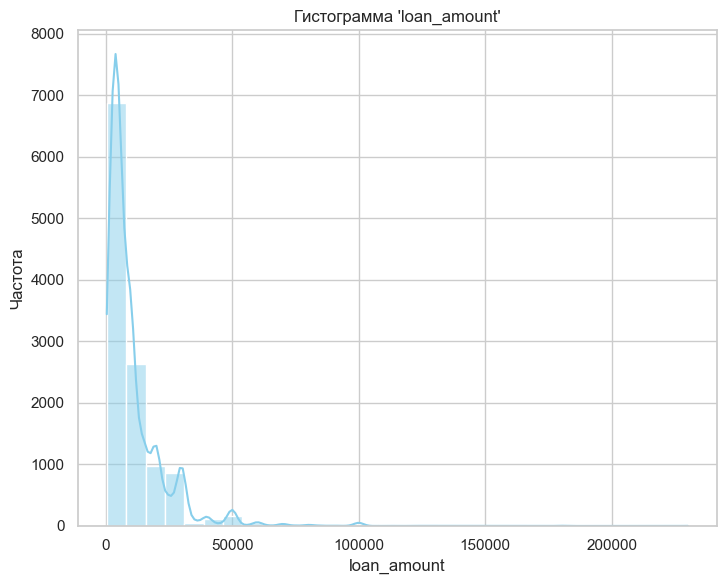

Построение для 'age'...


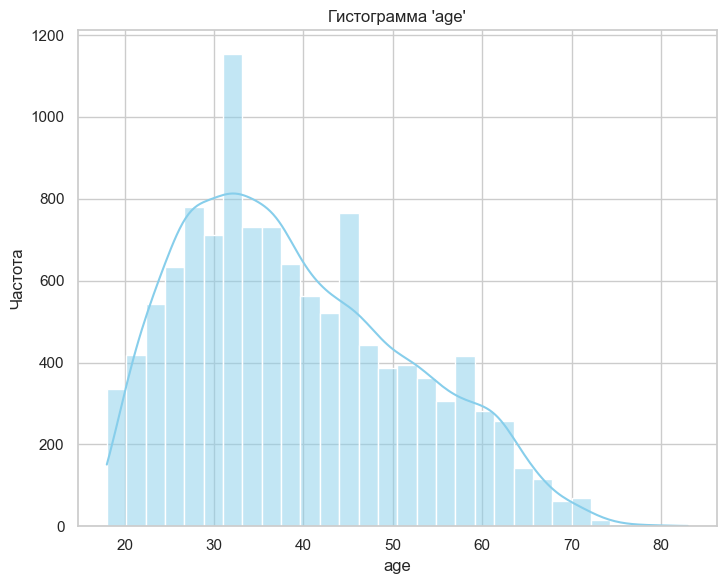

Построение для 'dependants'...


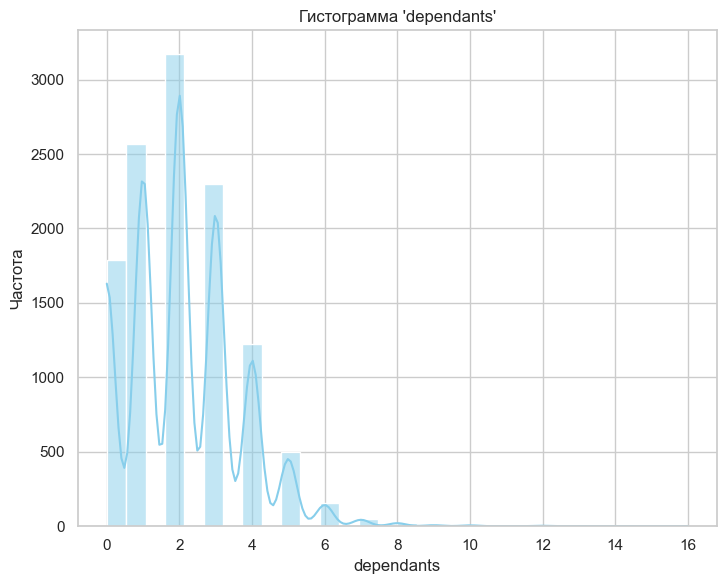

Построение для 'months_at_current_address'...


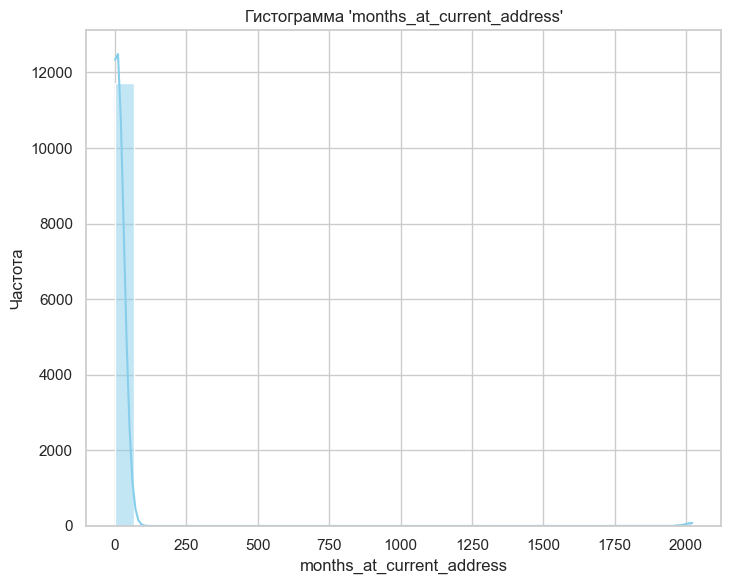

Построение для 'months_at_job'...


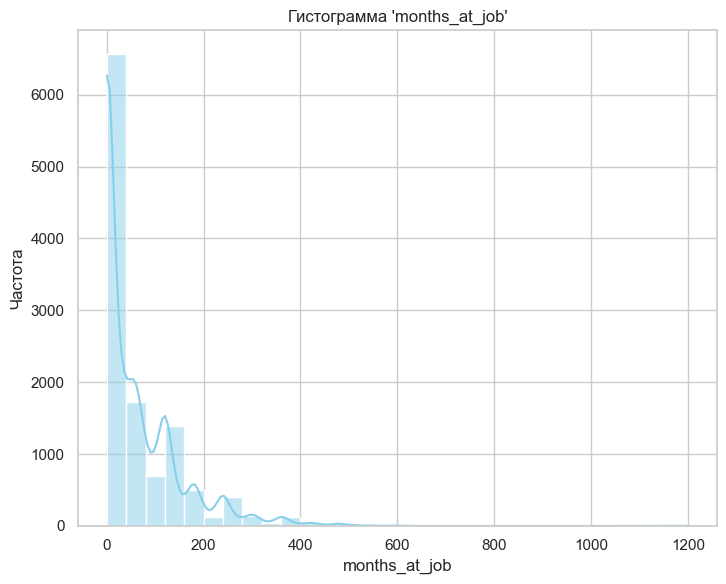

Построение для 'net_main_income'...


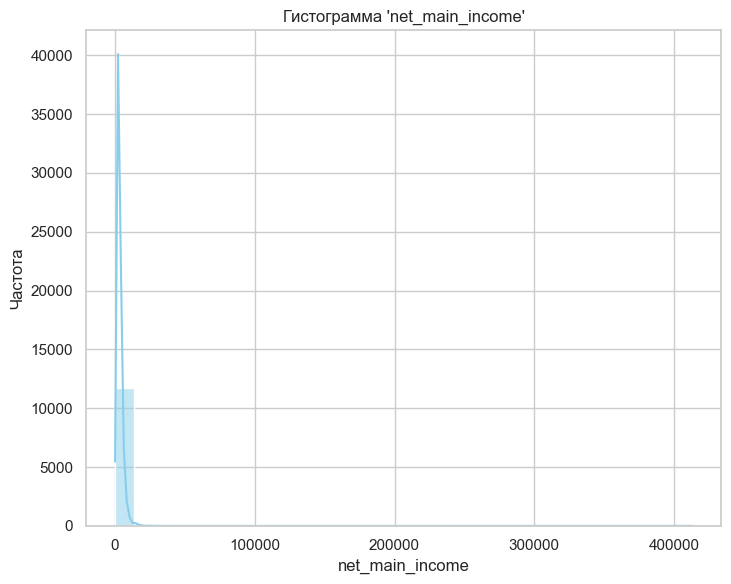

Построение для 'reported_expenses'...


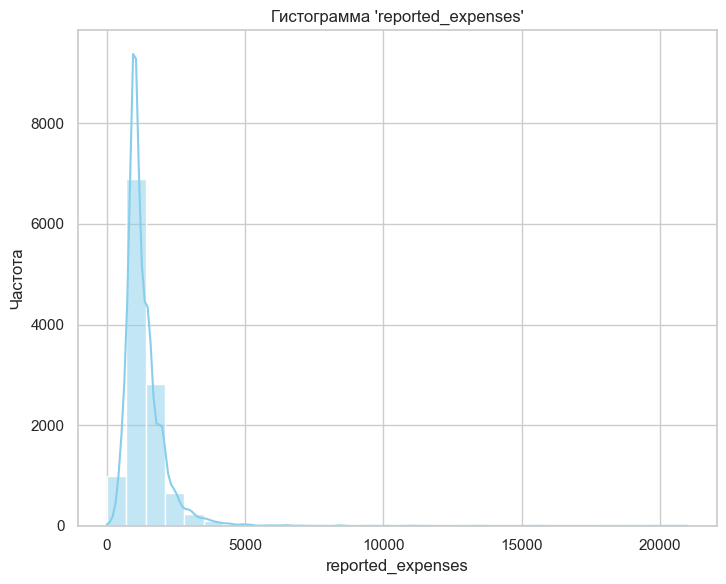

Построение для 'months_with_bank'...


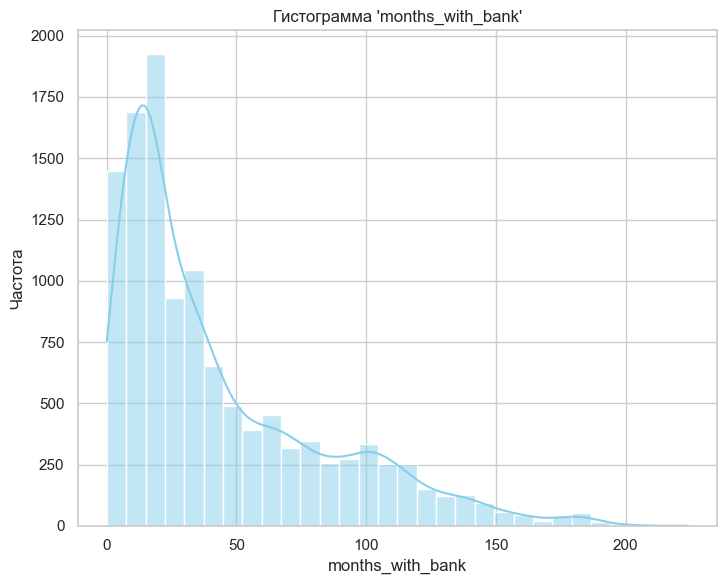

Построение для 'gb_90ever'...


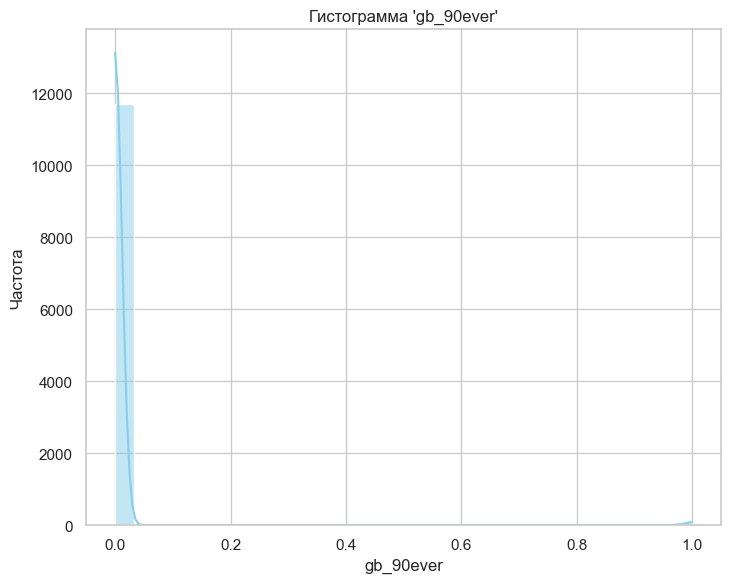

Построение для 'gb_cum_dlq_90'...


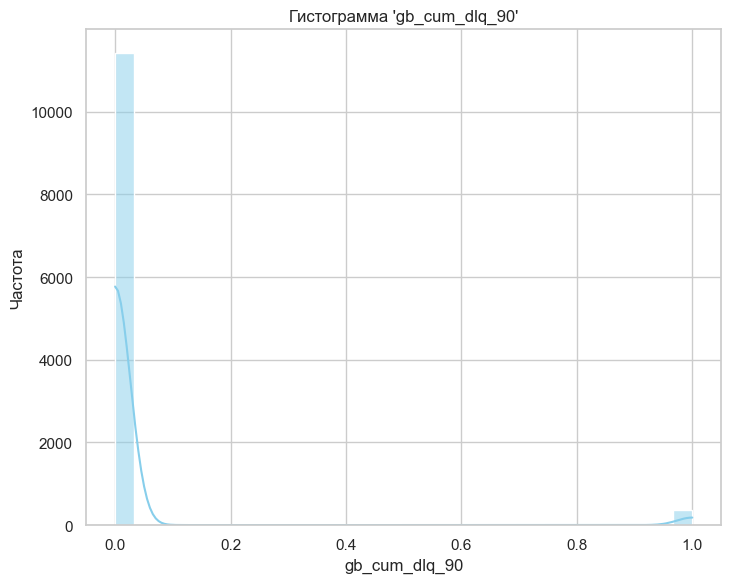

Построение для 'gb_60ever'...


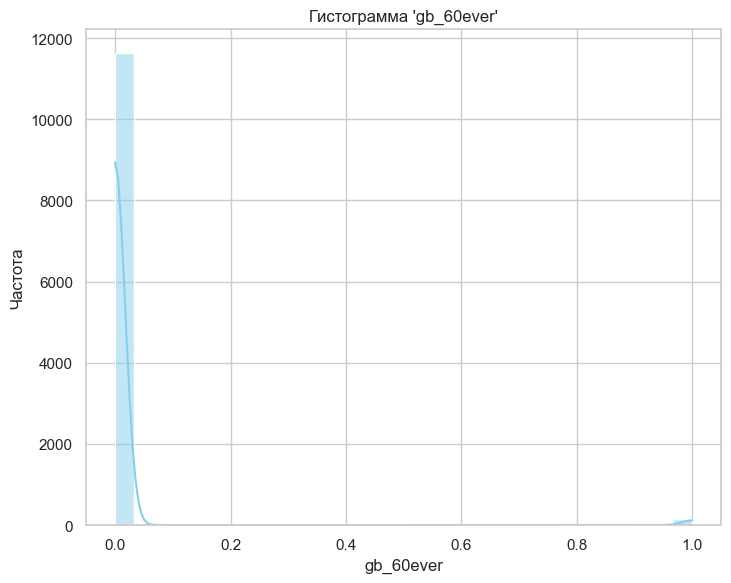

Построение для 'bki_number_of_loans'...


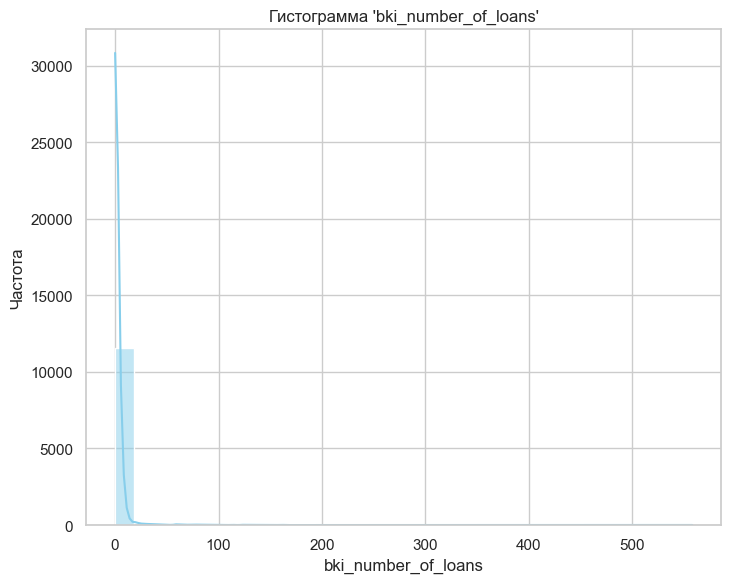

Построение для 'loan_month'...


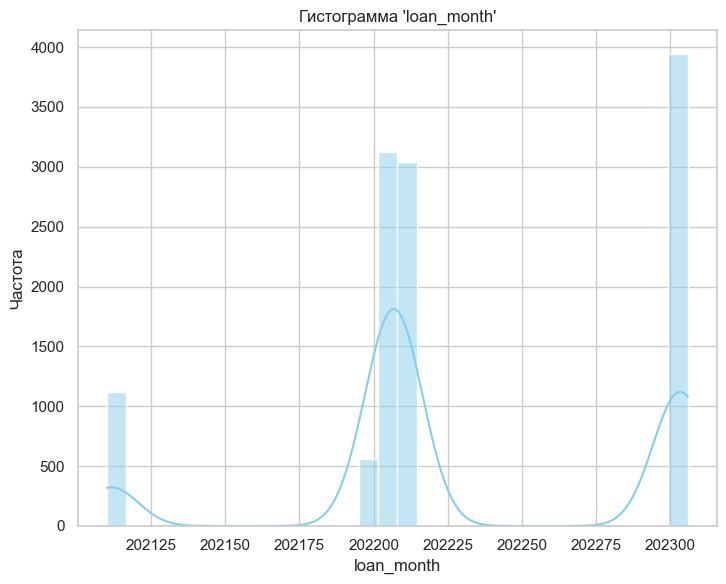

Построение для 'previous_loans_count'...


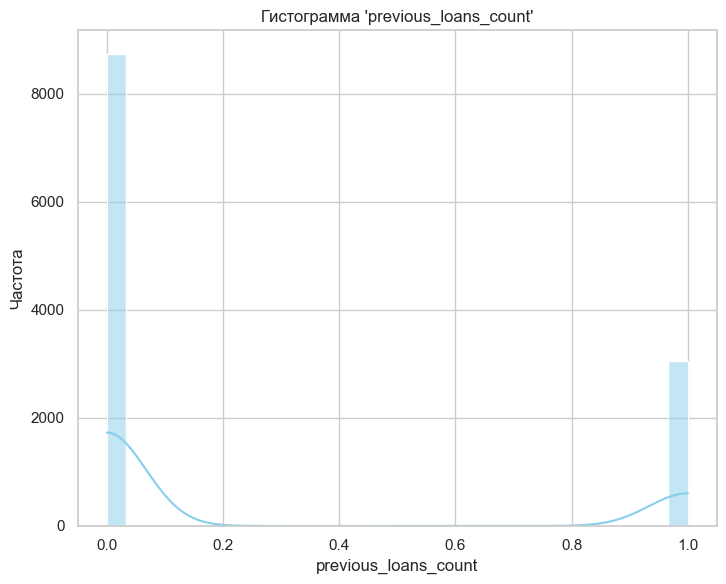

In [61]:
%matplotlib inline

print("Построение графиков для числовых столбцов...")
for col in numeric_columns:
    print(f"Построение для '{col}'...")
    plot_numeric(col)

# Итерация по категориальным столбцам и построение графиков

Построение графиков для категориальных столбцов...
Построение для 'salary_payment_in_bank_account'...


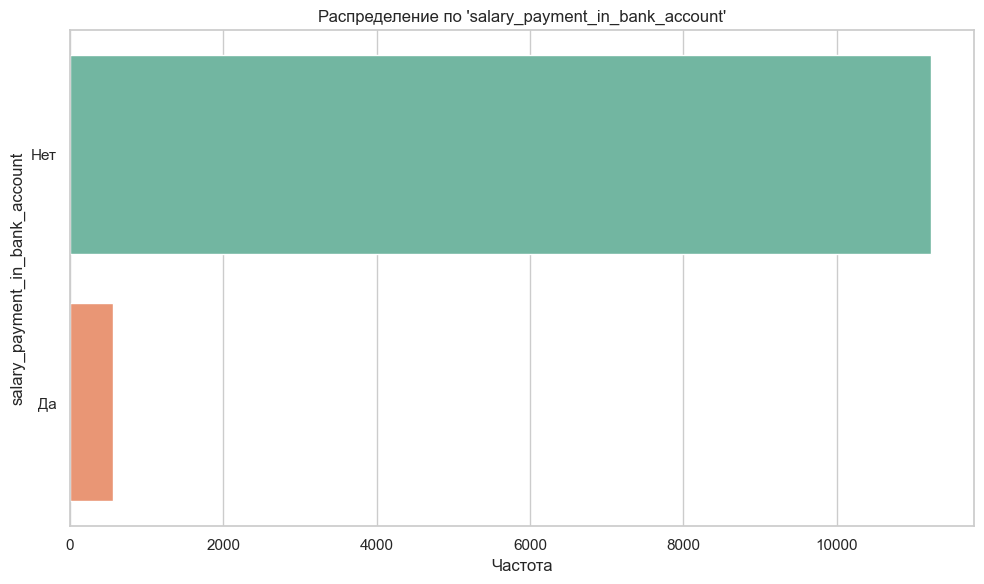

Построение для 'gender'...


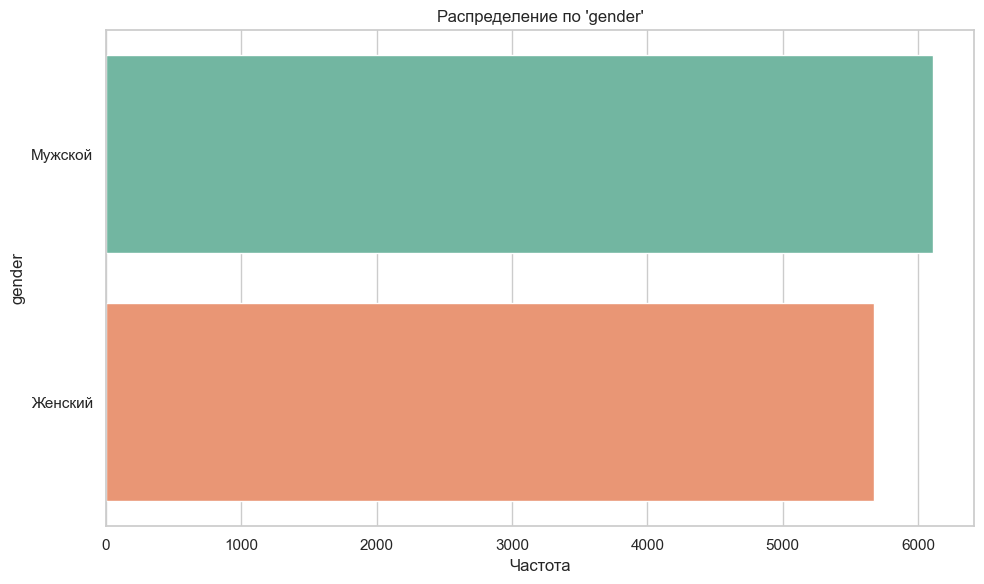

Построение для 'region_of_registration'...


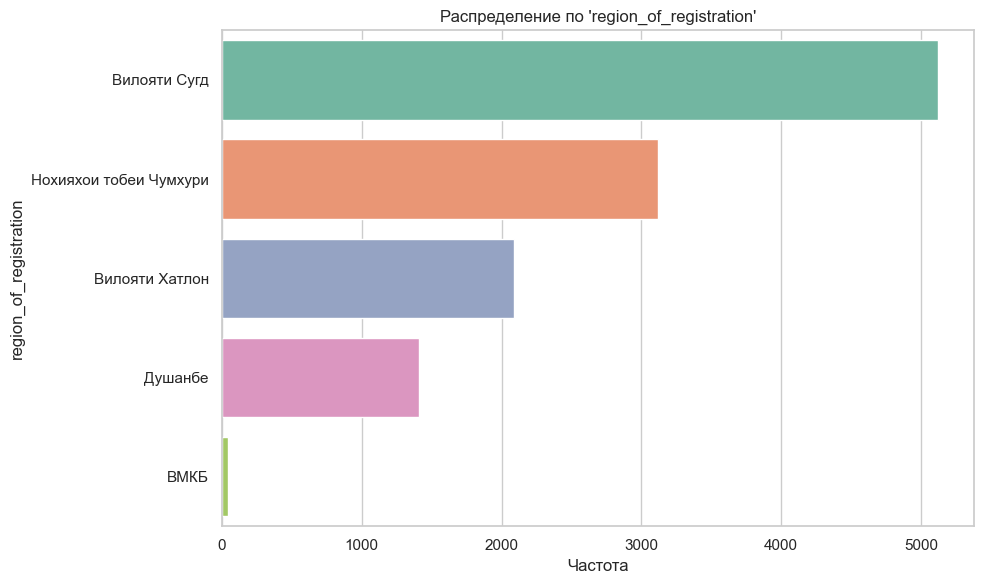

Построение для 'education'...


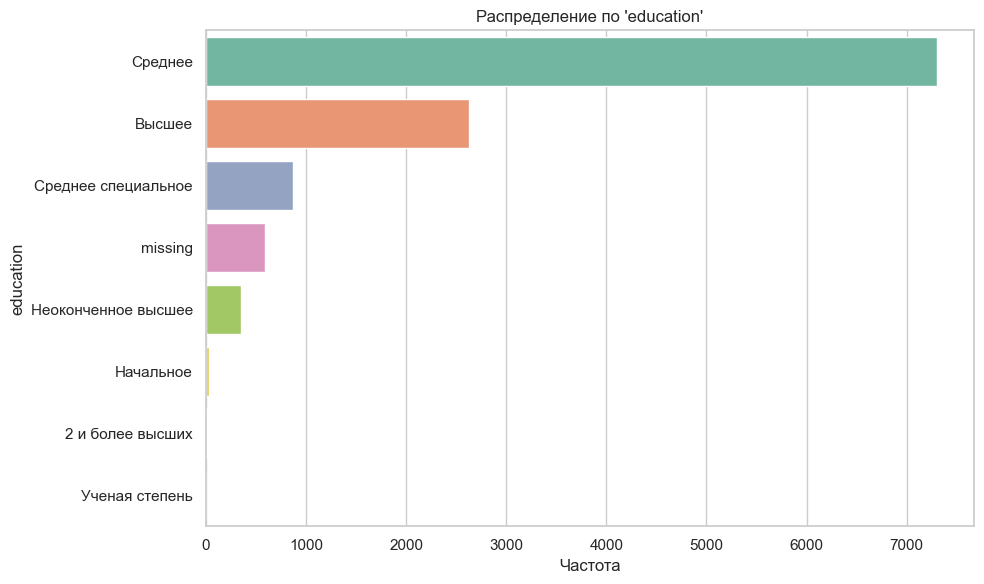

Построение для 'marital_status'...


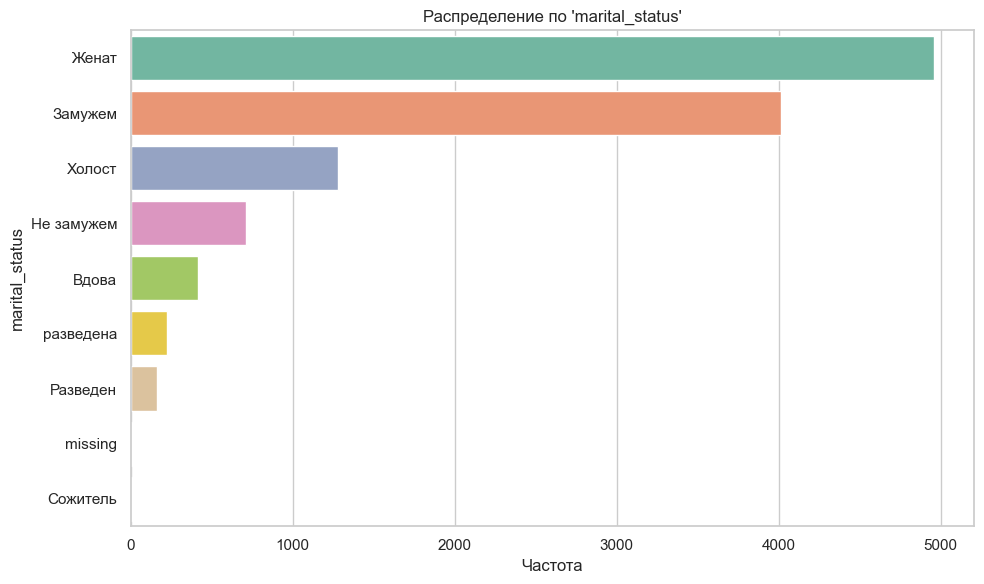

Построение для 'employment_type'...


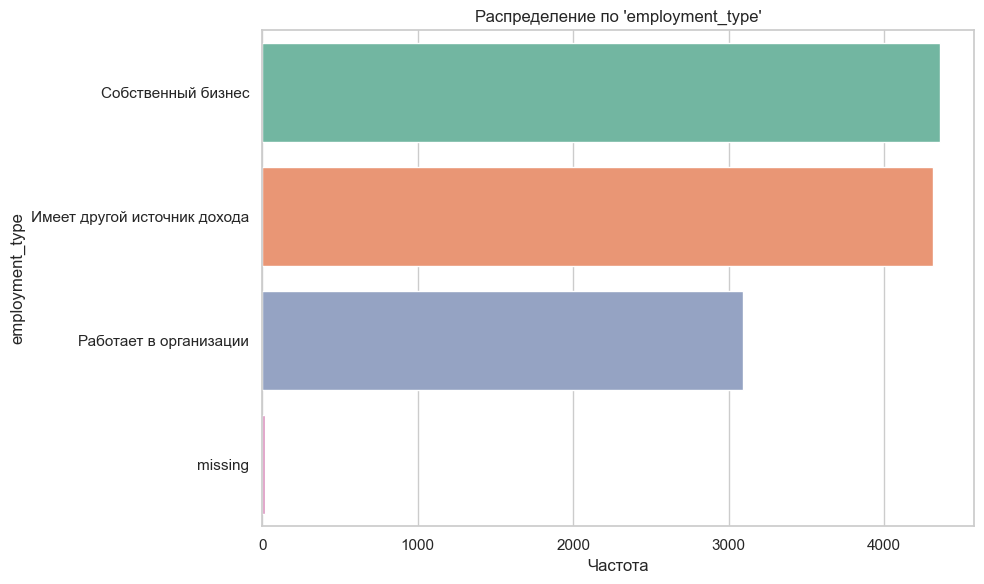

Построение для 'employment_segment'...


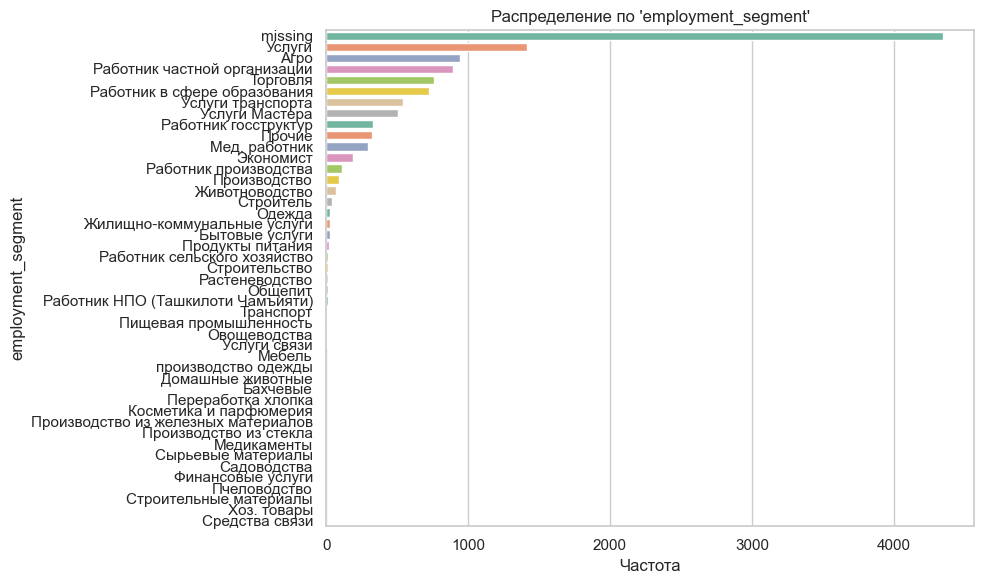

Построение для 'source_of_main_income'...


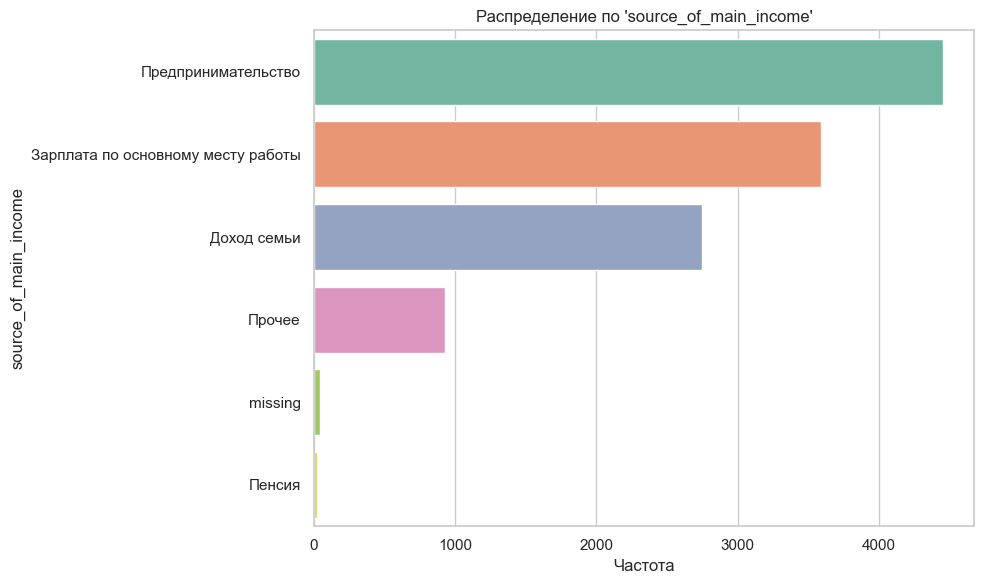

Построение для 'property_object'...


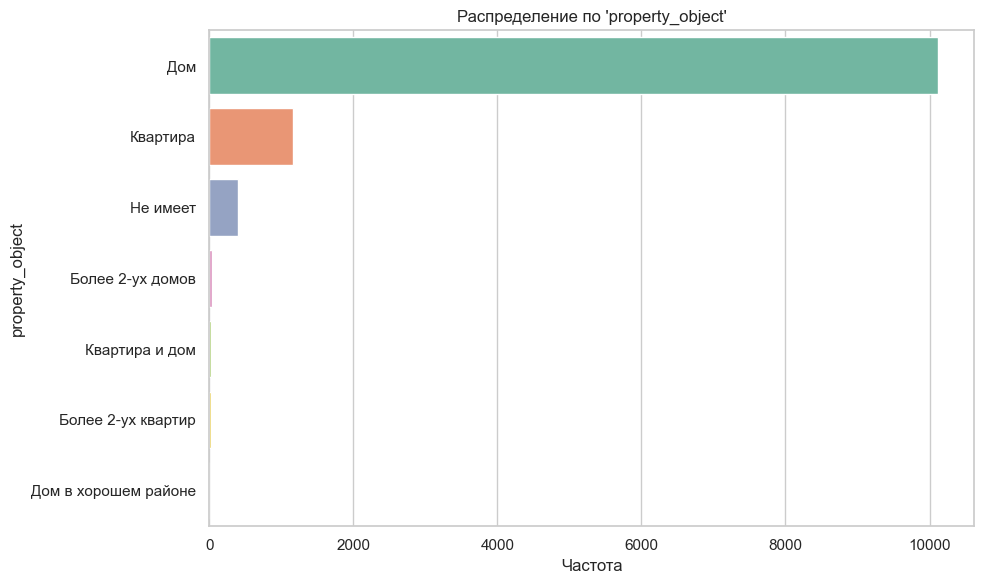

Построение для 'eskhata_online'...


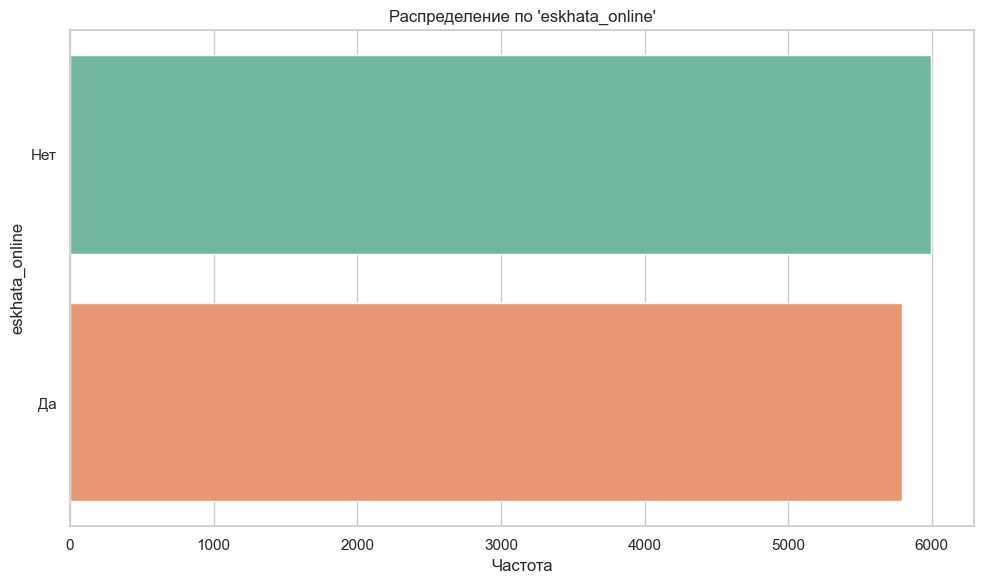

Построение для 'plastic_cards'...


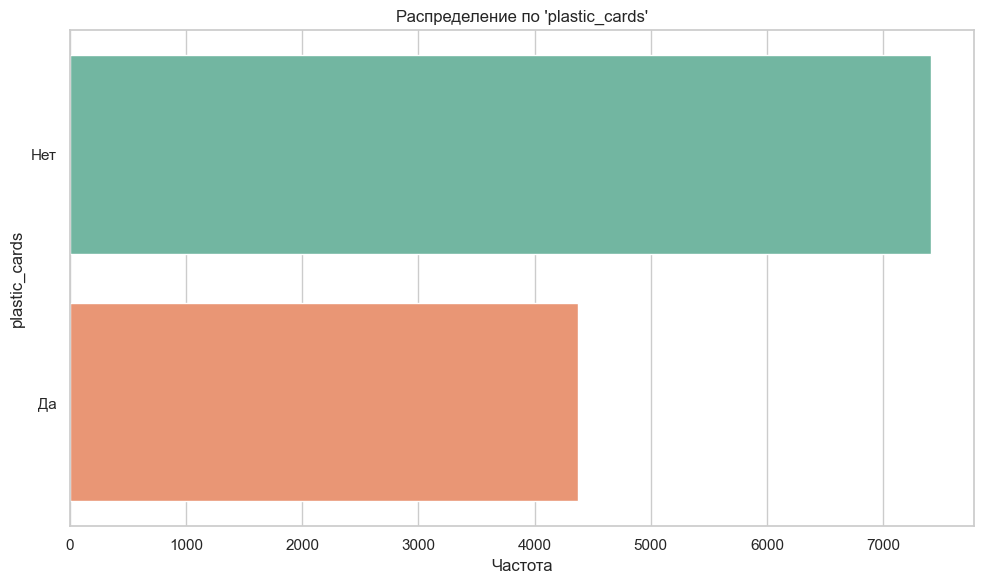

Построение для 'bki_rating'...


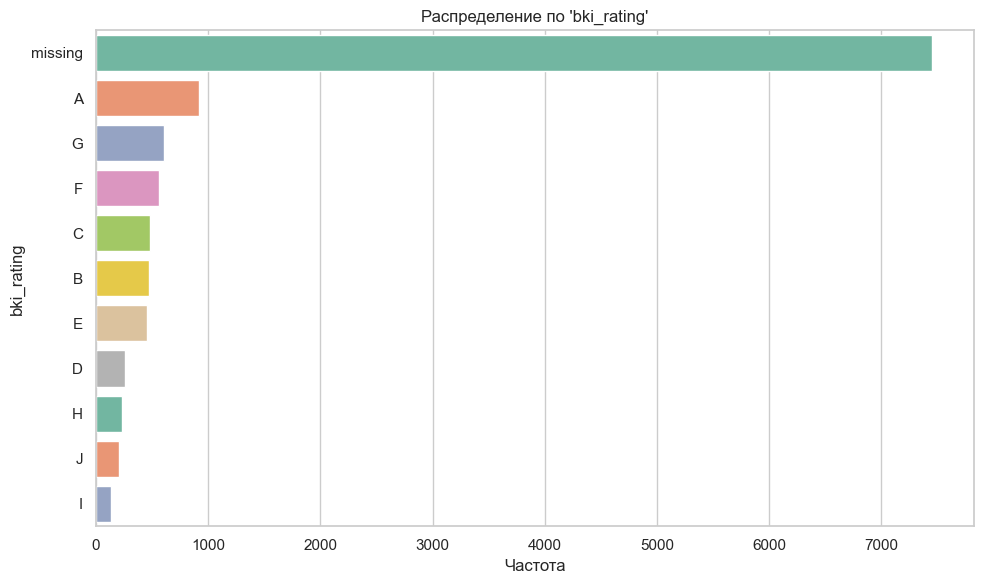

In [62]:
print("Построение графиков для категориальных столбцов...")
for col in categorical_columns:
    print(f"Построение для '{col}'...")
    plot_categorical(col)

# Итерация по временным столбцам и построение графиков

In [63]:
print("Построение графиков для временных столбцов...")
for col in datetime_columns:
    print(f"Построение для '{col}'...")
    plot_datetime(col)

print("Все графики построены.")


Построение графиков для временных столбцов...
Все графики построены.


# Сохранение графиков

In [64]:
# Создаём новый Excel-файл
workbook = Workbook()

# Удаляем стандартный лист, который создаётся по умолчанию
default_sheet = workbook.active
workbook.remove(default_sheet)

# Создаём листы для каждого типа столбцов
worksheet_numeric = workbook.create_sheet('Числовые')
worksheet_categorical = workbook.create_sheet('Категориальные')
worksheet_datetime = workbook.create_sheet('Временные')

# Функция для вставки изображений в лист
def insert_images(worksheet, folder, columns, start_row=1, start_col=1, scale=0.5):
    row = start_row
    col = start_col
    for column in columns:
        image_path = os.path.join('plots', folder, f'{column}.png')
        if os.path.exists(image_path):
            try:
                img = Image(image_path)
                # Масштабируем изображение
                img.width *= scale
                img.height *= scale
                # Определяем ячейку для вставки
                cell = worksheet.cell(row=row, column=col).coordinate
                worksheet.add_image(img, cell)
                print(f"Вставлено изображение: {image_path} в ячейку {cell} на листе '{worksheet.title}'")
                row += 20  # Переходим на следующую строку для следующего изображения
            except Exception as e:
                print(f"Ошибка при вставке изображения '{image_path}': {e}")
        else:
            print(f"Изображение для столбца '{column}' не найдено по пути: {image_path}")

# Вставляем графики в соответствующие листы
print("Вставка графиков в Excel-файл...")

insert_images(worksheet_numeric, 'numeric', numeric_columns)
insert_images(worksheet_categorical, 'categorical', categorical_columns)
insert_images(worksheet_datetime, 'datetime', datetime_columns)

# Сохраняем Excel-файл
workbook.save('Графики.xlsx')

print("Графики успешно вставлены в файл 'Графики.xlsx'.")


Вставка графиков в Excel-файл...
Изображение для столбца 'loan_amount' не найдено по пути: plots\numeric\loan_amount.png
Изображение для столбца 'age' не найдено по пути: plots\numeric\age.png
Изображение для столбца 'dependants' не найдено по пути: plots\numeric\dependants.png
Изображение для столбца 'months_at_current_address' не найдено по пути: plots\numeric\months_at_current_address.png
Изображение для столбца 'months_at_job' не найдено по пути: plots\numeric\months_at_job.png
Изображение для столбца 'net_main_income' не найдено по пути: plots\numeric\net_main_income.png
Изображение для столбца 'reported_expenses' не найдено по пути: plots\numeric\reported_expenses.png
Изображение для столбца 'months_with_bank' не найдено по пути: plots\numeric\months_with_bank.png
Изображение для столбца 'gb_90ever' не найдено по пути: plots\numeric\gb_90ever.png
Изображение для столбца 'gb_cum_dlq_90' не найдено по пути: plots\numeric\gb_cum_dlq_90.png
Изображение для столбца 'gb_60ever' не найд

# Группировка по loan_month и вычисление показателей просроченности

In [65]:
logging.info("Группировка по 'loan_month' и вычисление показателей просроченности.")
rep_gb_90ever_month = df_selected.groupby('loan_month').agg(
    count=('gb_90ever', 'count'),
    bad_num=('gb_90ever', 'sum'),
    bad_rate=('gb_90ever', 'mean')
).reset_index()

rep_gb_cum_dlq_90_month = df_selected.groupby('loan_month').agg(
    count=('gb_cum_dlq_90', 'count'),
    bad_num=('gb_cum_dlq_90', 'sum'),
    bad_rate=('gb_cum_dlq_90', 'mean')
).reset_index()

rep_gb_60ever_month = df_selected.groupby('loan_month').agg(
    count=('gb_60ever', 'count'),
    bad_num=('gb_60ever', 'sum'),
    bad_rate=('gb_60ever', 'mean')
).reset_index()


2024-12-10 16:45:15,695 - INFO - Группировка по 'loan_month' и вычисление показателей просроченности.


# Создание выборок по типу занятости

In [66]:
logging.info("Создание выборок по типу занятости.")
sample_empl = df_selected[
    (df_selected['employment_type'] == "Работает в организации") &
    (df_selected['employment_segment'].isin([
        "Мед. работник",
        "Работник в сфере образования",
        "Работник госструктур",
        "Работник НПО (Ташкилоти Чамъияти)",
        "Работник производства",
        "Работник сельского хозяйство",
        "Работник частной организации",
        "Строитель",
        "Экономист"
    ]))
].copy()

sample_bus = df_selected[
    (df_selected['employment_type'] == "Собственный бизнес") &
    (df_selected['employment_segment'].isin([
        "Агро",
        "Производство",
        "Торговля",
        "Услуги",
        "Услуги Мастера",
        "Услуги транспорта"
    ]))
].copy()

sample_other = df_selected[
    (df_selected['employment_type'] == "Имеет другой источник дохода") &
    (df_selected['employment_segment'].isna())
].copy()

2024-12-10 16:45:15,786 - INFO - Создание выборок по типу занятости.


In [67]:
logging.info("Вывод размеров выборок.")
print(f"\nРазмер выборки для работников: {sample_empl.shape[0]}")
print(f"Размер выборки для бизнесменов: {sample_bus.shape[0]}")
print(f"Размер выборки для других источников дохода: {sample_other.shape[0]}")

2024-12-10 16:45:15,945 - INFO - Вывод размеров выборок.



Размер выборки для работников: 51544
Размер выборки для бизнесменов: 79298
Размер выборки для других источников дохода: 0


In [68]:
df.head(5)

,customer_id,application_id,account_id,branch_id,product_id,application_date,date_loan_granted,loan_amount,first_instalment_due_date,interest_rate,collateral_type,value_of_collateral,property_type,salary_payment_in_bank_account,loan_type,number_of_instalments,instalment_amount,date_of_birth,gender,city_of_living,region_of_living,city_of_registration,region_of_registration,work_phone_number,mobile_phone_number,education,marital_status,dependants,number_children,months_at_current_address,employment_type,employment_sector,employment_segment,months_at_job,net_main_income,source_of_main_income,additional_income,source_of_additional_income,reported_expenses,months_with_bank,current_exposure,client_type,property_object,eskhata_online,plastic_cards,deposit,state,rejection_reason,run_date,date_account_opened,current_balance,date_last_payment,date_final_payment,due_date,payment_amount,account_status,payments_in_arrears,cumulative_delinquency,amount_due,principal_amount,interest_accrued,outstanding_balance,arrears_amount,current_dpd,max_dpd,max_dpd_lifetime,default_flag,number_of_extensions,bki_rating,bki_number_of_loans,ftd_1,ftd_2,ftd_3,ftd_4,age,loan_month,city_of_living_eq_registration,is_collateral,previous_loans_count,gb_90ever,gb_cum_dlq_90,gb_60ever
0,25121517058,764446/КР,35619143897,"ФИЛИАЛИ ЧСК ""БОНКИ ЭСХАТА"" ДАР Ш.ДУШАНБЕ",Карзхои гуногунмаксад,2021-10-19,2021-11-02,12300.0,2021-12-02,31.0,NaN,NaN,NaN,Нет,Многоцелевые кредиты_005_аннуитет,18,863.0,1998-01-07,Женский,нохияи Фирдавси,Душанбе,Фирдавси,Душанбе,992000805085,NaN,Высшее,Не замужем,0,2,0,Имеет другой источник дохода,NaN,NaN,0,3121.36,Прочее,NaN,NaN,1272.0,36,0.00,0,Квартира,Да,Да,0.0,NaN,NaN,2023-06-30,2021-11-02,0.0,NaT,2023-04-20,NaT,NaN,Закрыт,NaN,0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,NaN,0,0,0,0,0,23,202110,Нет,Нет,0,0,0,0
1,847140141,766801/КР,35733163635,"ФИЛИАЛИ ЧСК ""БОНКИ ЭСХАТА"" ДАР Ш.ИСТАРАВШАН",Карзхои гуногунмаксад,2021-10-25,2021-11-01,20000.0,2021-12-01,30.0,1) Поручитель;,1) 0;,1) Поручитель;,Нет,Многоцелевые кредиты_005_аннуитет,24,1118.0,1969-05-16,Мужской,Истаравшан,Вилояти Сугд,Истаравшан,Вилояти Сугд,992985675558,NaN,Среднее,Женат,2,2,6,Собственный бизнес,Самозанятость,Услуги транспорта,276,3800.00,Прочее,NaN,NaN,1500.0,143,4691.17,1,Дом,Нет,Нет,0.0,NaN,NaN,2023-06-30,2021-11-01,0.0,2023-04-26,2023-10-26,2023-06-01,1118.0,Закрыт,NaN,0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,NaN,5,0,0,0,0,52,202110,Да,Нет,0,0,0,0
2,6286580057,766319/КР,35736913632,"ФИЛИАЛИ ЧСК ""БОНКИ ЭСХАТА"" ДАР Ш.ИСТАРАВШАН",Карзхои гуногунмаксад,2021-10-25,2021-11-05,10000.0,2021-12-06,30.0,NaN,NaN,NaN,Нет,Многоцелевые кредиты_005_аннуитет,24,559.0,1991-03-02,Мужской,Истаравшан,Вилояти Сугд,Истаравшан,Вилояти Сугд,992988621755,NaN,Среднее,Женат,3,2,9,Собственный бизнес,Самозанятость,Услуги транспорта,60,3500.00,Прочее,NaN,NaN,1000.0,61,4301.47,1,Дом,Нет,Нет,0.0,NaN,NaN,2023-06-30,2021-11-05,0.0,2023-04-03,2023-10-26,2023-06-05,559.0,Закрыт,NaN,19,0.0,0.0,0.0,0.0,0.0,0,0,7,NaN,0,NaN,2,0,1,0,7,30,202110,Да,Нет,0,0,0,0
3,14939826396,766446/КР,35741587858,"ФИЛИАЛИ ЧСК ""БОНКИ ЭСХАТА"" ДАР Ш. КУЛОБ",Карзхои гуногунмаксад,2021-10-25,2021-11-03,3300.0,2021-12-03,31.0,NaN,NaN,NaN,Нет,Многоцелевые кредиты_005_аннуитет,12,323.0,1966-10-23,Мужской,Фархор,Вилояти Хатлон,Пархар,Вилояти Хатлон,+992900078418; ; ;,NaN,Среднее,Женат,1,2,39,Имеет другой источник дохода,NaN,NaN,0,2400.00,Доход семьи,NaN,NaN,1000.0,60,1153.52,1,Дом,Нет,Нет,0.0,NaN,NaN,2023-06-30,2021-11-03,0.0,2022-09-12,2022-10-26,NaT,NaN,Закрыт,NaN,0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,NaN,0,0,0,0,0,55,202110,Нет,Нет,0,0,0,0
4,32830136711,767392/КР,35754732217,"ФИЛИАЛИ ЧСК ""БОНКИ ЭСХАТА"" ДАР Ш.ДУШАНБЕ, Н.СИ...",Карзхои гуногунмаксад,2021-10-26,2021-11-03,5000.0,2021-12-03,31.0,NaN,NaN,NaN,Нет,Многоцелевые кредиты_005_аннуитет,6,910.0,2001-06-07,Мужской,поселки Варзобского района,Нохияхои тобеи Чумхури,поселки Варзобского района,Нохияхои тобеи Чумхури,NaN,992888051515,Среднее,Холост,0,0,2,Собственный бизнес,Самозанятость,Услуги транспорта,

# Создание выборки для анализа

In [70]:
# Пример выбора выборки для анализа
sample = sample_empl.copy()
# sample = sample_bus.copy()
# sample = sample_other.copy()

logging.info("Структура выбранной выборки:")
print(sample.info())

2024-12-10 16:45:30,941 - INFO - Структура выбранной выборки:


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51544 entries, 8 to 235696
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_amount                     51544 non-null  float64
 1   is_collateral                   51544 non-null  bool   
 2   salary_payment_in_bank_account  51544 non-null  object 
 3   age                             51544 non-null  int64  
 4   gender                          51544 non-null  object 
 5   region_of_registration          51544 non-null  object 
 6   city_of_living_eq_registration  51544 non-null  bool   
 7   education                       51544 non-null  object 
 8   marital_status                  51544 non-null  object 
 9   dependants                      51544 non-null  int64  
 10  months_at_current_address       51544 non-null  int64  
 11  employment_type                 51544 non-null  object 
 12  employment_segment             

# Определение целевой переменной

In [71]:
# Создание переменной gb
logging.info("Создание целевой переменной 'gb'.")
sample.loc[:, 'gb'] = sample['gb_60ever']
sample.gb = sample.gb.astype(int)

# sample.loc[:, 'gb'] = sample['gb_cum_dlq_90']

2024-12-10 16:45:32,531 - INFO - Создание целевой переменной 'gb'.


# Семплирование
## Создание выборок для Train и Test

In [72]:
# Выборка для обучения модели
dev = sample[(sample['loan_month'] >= 202110) & (sample['loan_month'] < 202210)].drop(columns=['loan_month']).copy()

# Выборка для тестирования модели на временную устойчивость
oot = sample[(sample['loan_month'] >= 202210) & (sample['loan_month'] < 202303)].copy()

# Выборка для кросс-валидации внутри обучающей выборки
oot2 = sample[(sample['loan_month'] >= 202207) & (sample['loan_month'] < 202210)].copy()

# Выборка для финального обучения модели
dev_final = sample[(sample['loan_month'] >= 202110) & (sample['loan_month'] < 202302)].drop(columns=['loan_month']).copy()

In [73]:
# Изучение распределений с графиками
logging.info("Изучение распределений в выборках.")

# Функция для подсчета распределений и построения графика
def plot_distribution(sample, sample_name):
    print(f"\nРаспределение в {sample_name}:")
    
    # Подсчитываем количество каждого значения в 'gb' (0 и 1)
    distribution = sample['gb'].value_counts()
    print(distribution)
    
    # Рассчитываем доли значений
    proportion_1 = distribution.get(1, 0) / len(sample)
    proportion_0 = distribution.get(0, 0) / len(sample)
    
    print(f"Доля значения '1' в {sample_name}: {proportion_1:.4f}")
    print(f"Доля значения '0' в {sample_name}: {proportion_0:.4f}")
    
#     # Построение графика распределения
#     plt.figure(figsize=(6, 4))
#     distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])
#     plt.title(f"Распределение значений в {sample_name}")
#     plt.xlabel('Значение gb')
#     plt.ylabel('Количество')
#     plt.xticks(rotation=0)
#     plt.tight_layout()
#     plt.show()

# Распределение для каждой выборки с графиками
plot_distribution(dev, "Development Sample")
plot_distribution(oot, "Out-of-time Sample")
plot_distribution(oot2, "Out-of-time 2 Sample")
plot_distribution(dev_final, "Development Final Sample")


2024-12-10 16:45:36,320 - INFO - Изучение распределений в выборках.



Распределение в Development Sample:
0    27235
1      599
Name: gb, dtype: int64
Доля значения '1' в Development Sample: 0.0215
Доля значения '0' в Development Sample: 0.9785

Распределение в Out-of-time Sample:
0    12349
1       80
Name: gb, dtype: int64
Доля значения '1' в Out-of-time Sample: 0.0064
Доля значения '0' в Out-of-time Sample: 0.9936

Распределение в Out-of-time 2 Sample:
0    9216
1     139
Name: gb, dtype: int64
Доля значения '1' в Out-of-time 2 Sample: 0.0149
Доля значения '0' в Out-of-time 2 Sample: 0.9851

Распределение в Development Final Sample:
0    36967
1      669
Name: gb, dtype: int64
Доля значения '1' в Development Final Sample: 0.0178
Доля значения '0' в Development Final Sample: 0.9822


In [74]:
# Вывод количества строк в каждой выборке
logging.info("Вывод количества строк в каждой выборке.")
print(f"\nКоличество строк в Development Sample: {dev.shape[0]}")
print(f"Количество строк в Out-of-time Sample: {oot.shape[0]}")
print(f"Количество строк в Out-of-time 2 Sample: {oot2.shape[0]}")
print(f"Количество строк в Development Final Sample: {dev_final.shape[0]}")


2024-12-10 16:45:37,416 - INFO - Вывод количества строк в каждой выборке.



Количество строк в Development Sample: 27834
Количество строк в Out-of-time Sample: 12429
Количество строк в Out-of-time 2 Sample: 9355
Количество строк в Development Final Sample: 37636


# MACHINE LEARNING

In [75]:
import pandas as pd
import numpy as np
import json
import scorecardpy as sc
import statsmodels.api as sm
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (make_scorer, precision_score, recall_score, accuracy_score, roc_curve,
                             f1_score, auc, roc_auc_score, confusion_matrix, classification_report)
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE






# Расчет Information Value (IV)

In [76]:
logging.info("Расчет Information Value (IV) для всех переменных в dev_final.")
iv_values_final = sc.iv(dt=dev_final, y='gb')


2024-12-10 16:45:45,022 - INFO - Расчет Information Value (IV) для всех переменных в dev_final.


In [77]:
# Просмотр структуры и первых строк DataFrame iv_values_final
print("Структура iv_values_final:")
print(iv_values_final.columns)

print("\nПервые 5 строк iv_values_final:")
print(iv_values_final.head())


Структура iv_values_final:
Index(['variable', 'info_value'], dtype='object')

Первые 5 строк iv_values_final:
             variable  info_value
10          gb_60ever   17.210712
28      gb_cum_dlq_90    7.762180
11          gb_90ever    6.407824
6         loan_amount    1.865620
3   reported_expenses    1.693050


# Отбор переменных на основе IV

In [78]:
logging.info("Отбор переменных на основе IV >= 0.01.")
selected_vars_iv = iv_values_final[
    iv_values_final['info_value'] >= 0.01
]['variable'].tolist()

logging.info(f"Переменные с info_value >= 0.01: {selected_vars_iv}")


2024-12-10 16:45:53,165 - INFO - Отбор переменных на основе IV >= 0.01.
2024-12-10 16:45:53,166 - INFO - Переменные с info_value >= 0.01: ['gb_60ever', 'gb_cum_dlq_90', 'gb_90ever', 'loan_amount', 'reported_expenses', 'net_main_income', 'months_at_job', 'bki_number_of_loans', 'months_with_bank', 'age', 'employment_segment', 'marital_status', 'months_at_current_address', 'client_type', 'bki_rating', 'salary_payment_in_bank_account', 'dependants', 'region_of_registration', 'education', 'eskhata_online', 'gender', 'property_object', 'city_of_living_eq_registration', 'source_of_main_income', 'plastic_cards', 'previous_loans_count']


# Вычисление доли пропусков для отобранных переменных

In [79]:
logging.info("Расчет доли пропусков для отобранных переменных.")
# Рассчитываем долю пропусков для отобранных переменных
missing_rates = dev_final[selected_vars_iv].isnull().mean().reset_index()
missing_rates.columns = ['variable', 'missing']


2024-12-10 16:45:53,179 - INFO - Расчет доли пропусков для отобранных переменных.


In [80]:
# Просмотр первых строк
logging.info("Структура missing_rates:")
display(missing_rates.columns)

logging.info("missing_rates:")
display(missing_rates.sort_values(by='missing', ascending=False))


2024-12-10 16:45:53,257 - INFO - Структура missing_rates:


Index(['variable', 'missing'], dtype='object')

2024-12-10 16:45:53,260 - INFO - missing_rates:


,variable,missing
0,gb_60ever,0.0
1,gb_cum_dlq_90,0.0
24,plastic_cards,0.0
23,source_of_main_income,0.0
22,city_of_living_eq_registration,0.0
21,property_object,0.0
20,gender,0.0
19,eskhata_online,0.0
18,education,0.0
17,region_of_registration,0.0


# Объединение IV и missing_rates

In [81]:
# Объединяем IV и по долю пропусков
iv_with_missing = iv_values_final.merge(missing_rates, on='variable')

# Просмотр первых строк
logging.info("Структура iv_with_missing:")
display(iv_with_missing.columns)

logging.info("iv_with_missing:")
display(iv_with_missing)


2024-12-10 16:45:53,290 - INFO - Структура iv_with_missing:


Index(['variable', 'info_value', 'missing'], dtype='object')

2024-12-10 16:45:53,292 - INFO - iv_with_missing:


,variable,info_value,missing
0,gb_60ever,17.210712,0.0
1,gb_cum_dlq_90,7.762180,0.0
2,gb_90ever,6.407824,0.0
3,loan_amount,1.865620,0.0
4,reported_expenses,1.693050,0.0
5,net_main_income,1.460954,0.0
6,months_at_job,0.902590,0.0
7,bki_number_of_loans,0.695739,0.0
8,months_with_bank,0.541801,0.0
9,age,0.410731,0.0


# Фильтрация переменных по IV и пропускам

In [82]:
logging.info("Фильтрация переменных по info_value >= 0.01 и missing <= 0.95.")
# Отбор переменных с info_value >= 0.01 и пропусками <= 0.95
filtered_iv = iv_with_missing[
    (iv_with_missing['info_value'] >= 0.01) &
    (iv_with_missing['missing'] <= 0.95)
]

# Извлечение списка переменных
selected_vars_final = filtered_iv['variable'].tolist()

# Исключение определенных переменных
vars_to_remove = ["gb_90ever", "gb_60ever", "gb_cum_dlq_90", "current_exposure"]
selected_vars_final = [var for var in selected_vars_final if var not in vars_to_remove]

logging.info(f"Отобранные переменные после фильтрации по IV и пропускам: {selected_vars_final}")


2024-12-10 16:45:53,319 - INFO - Фильтрация переменных по info_value >= 0.01 и missing <= 0.95.
2024-12-10 16:45:53,323 - INFO - Отобранные переменные после фильтрации по IV и пропускам: ['loan_amount', 'reported_expenses', 'net_main_income', 'months_at_job', 'bki_number_of_loans', 'months_with_bank', 'age', 'employment_segment', 'marital_status', 'months_at_current_address', 'client_type', 'bki_rating', 'salary_payment_in_bank_account', 'dependants', 'region_of_registration', 'education', 'eskhata_online', 'gender', 'property_object', 'city_of_living_eq_registration', 'source_of_main_income', 'plastic_cards', 'previous_loans_count']


# Создание dev_final_sel

In [83]:
logging.info("Создание dev_final_sel с отобранными переменными.")
dev_final_sel = dev_final[selected_vars_final + ['gb']].copy()

logging.info(f"Количество строк в dev_final_sel: {dev_final_sel.shape[0]}")
logging.info(f"Количество столбцов в dev_final_sel: {dev_final_sel.shape[1]}")


2024-12-10 16:45:53,647 - INFO - Создание dev_final_sel с отобранными переменными.
2024-12-10 16:45:53,659 - INFO - Количество строк в dev_final_sel: 37636
2024-12-10 16:45:53,660 - INFO - Количество столбцов в dev_final_sel: 24


# Определение правил биннинга

In [84]:
logging.info("Определение правил биннинга для переменных.")

breaks = {
    'education': [
        "Высшее", "Ученая степень", "2 и более высших",
        "Среднее", "Начальное",
        "Среднее специальное",
        "Неоконченное высшее"
    ],
    'region_of_living': [
        "Вилояти Сугд", 
        "Вилояти Хатлон", "ВМКБ",
        "Душанбе", 
        "Нохияхои тобеи Чумхури"
    ],
    'marital_status': [
        "Женат", "Сожитель",
        "Замужем", "Вдова", "Разведена",
        "Холост", 
        "Не замужем", "Разведен"
    ],
    'employment_segment': [
        "Мед. работник", "Работник в сфере образования", "Экономист", "Работник НПО (Ташкилоти Чамъияти)",
        "Работник госструктур", "Строитель",
        "Работник производства", "Работник сельского хозяйство",
        "Работник частной организации"
    ],
    'source_of_main_income': [
        "Доход семьи",
        "Зарплата по основному месту работы",
        "Предпринимательство",
        "Пенсия", "Алименты", "Прочее", "missing"
    ],
    'months_at_job': [31, 61, 145, 277],
    'months_with_bank': [10, 25, 79],
    'net_main_income': ["missing", "1600", 3400]
}


2024-12-10 16:45:55,307 - INFO - Определение правил биннинга для переменных.


# Обработка пропусков в категориальных переменных: добавление категории 'missing'

In [85]:
logging.info("Обработка пропусков в категориальных переменных.")
for var in selected_vars_final:
    if dev_final_sel[var].dtype == 'object' or pd.api.types.is_categorical_dtype(dev_final_sel[var]):
        if dev_final_sel[var].isnull().any():
            dev_final_sel[var] = dev_final_sel[var].astype('category')
            if 'missing' not in dev_final_sel[var].cat.categories:
                dev_final_sel[var].cat.add_categories('missing', inplace=True)
            dev_final_sel[var].fillna('missing', inplace=True)

logging.info("Применение биннинга и расчет WOE на dev_final_sel.")


2024-12-10 16:45:56,699 - INFO - Обработка пропусков в категориальных переменных.
2024-12-10 16:45:56,722 - INFO - Применение биннинга и расчет WOE на dev_final_sel.


In [86]:
# Бининг переменных
try:
    bins_final = sc.woebin(
        dt=dev_final_sel,
        y="gb",
        method="tree",
        breaks_list=breaks,
        check_cate_num=False,
        count_distr_limit=0.05,
        bin_num_limit=5
    )
    logging.info("Биннинг и расчет WOE выполнены успешно.")
except Exception as e:
    logging.error(f"Ошибка при биннинге и расчете WOE: {e}")
    raise

[INFO] creating woe binning ...


2024-12-10 16:46:06,046 - INFO - Биннинг и расчет WOE выполнены успешно.


In [87]:
with pd.ExcelWriter('output.xlsx') as writer: 
    for k, v in bins_final.items(): 
        v.to_excel(writer, sheet_name=k)

# Разбиение данных на Train и Test

In [88]:
logging.info("Разбиение данных на Train и Test (Out-of-sample).")
train, test = train_test_split(
    dev_final_sel,
    test_size=0.33,
    random_state=42,
    stratify=dev_final_sel['gb']
)

logging.info(f"Количество строк в Train: {train.shape[0]}")
logging.info(f"Количество строк в Test: {test.shape[0]}")


2024-12-10 16:46:06,252 - INFO - Разбиение данных на Train и Test (Out-of-sample).
2024-12-10 16:46:06,278 - INFO - Количество строк в Train: 25216
2024-12-10 16:46:06,279 - INFO - Количество строк в Test: 12420


# Применение WOE кодирования к всем выборкам

In [89]:
logging.info("Применение WOE кодирования ко всем выборкам.")
dev_woe = sc.woebin_ply(dev, bins_final)
oot_woe = sc.woebin_ply(oot, bins_final)
oot2_woe = sc.woebin_ply(oot2, bins_final)

train_woe = sc.woebin_ply(train, bins_final)
test_woe = sc.woebin_ply(test, bins_final)

# Для финального полного обучающего семпла
dev_final_woe = sc.woebin_ply(dev_final_sel, bins_final)

# Для всего семпла
sample_woe = sc.woebin_ply(sample, bins_final)

2024-12-10 16:46:06,297 - INFO - Применение WOE кодирования ко всем выборкам.


[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...


# Расчет Information Value для WOE-переменных

In [90]:
logging.info("Расчет Information Value для WOE-переменных.")
iv_values_final_woe = sc.iv(dt=dev_final_woe, y='gb')

# Просмотр структуры и первых строк IV для WOE-переменных
print("Структура iv_values_final_woe:")
print(iv_values_final_woe.columns)

print("\niv_values_final_woe:")
print(iv_values_final_woe)

# Сохранение IV значений
iv_values_final_woe.to_excel("iv_values_woe.xlsx", index=False)

2024-12-10 16:46:26,481 - INFO - Расчет Information Value для WOE-переменных.


Структура iv_values_final_woe:
Index(['variable', 'info_value'], dtype='object')

iv_values_final_woe:
                              variable  info_value
1                    months_at_job_woe    0.407732
2                 months_with_bank_woe    0.381764
3                              age_woe    0.351508
14              employment_segment_woe    0.346704
7                   marital_status_woe    0.274859
18                     client_type_woe    0.228564
13                      bki_rating_woe    0.163719
9              bki_number_of_loans_woe    0.156708
22                     loan_amount_woe    0.136546
6   salary_payment_in_bank_account_woe    0.129708
4        months_at_current_address_woe    0.126534
10                       education_woe    0.099901
12          region_of_registration_woe    0.096069
20                  eskhata_online_woe    0.058784
15                      dependants_woe    0.058706
8                           gender_woe    0.056082
0   city_of_living_eq_registra

# Проверка корреляции между признаками

In [95]:
# Создаем список переменных
selected_vars_final = iv_values_final_woe['variable'].tolist()
selected_vars_final


['months_at_job_woe',
 'months_with_bank_woe',
 'age_woe',
 'employment_segment_woe',
 'marital_status_woe',
 'client_type_woe',
 'bki_rating_woe',
 'bki_number_of_loans_woe',
 'loan_amount_woe',
 'salary_payment_in_bank_account_woe',
 'months_at_current_address_woe',
 'education_woe',
 'region_of_registration_woe',
 'eskhata_online_woe',
 'dependants_woe',
 'gender_woe',
 'city_of_living_eq_registration_woe',
 'property_object_woe',
 'net_main_income_woe',
 'source_of_main_income_woe',
 'plastic_cards_woe',
 'previous_loans_count_woe',
 'reported_expenses_woe']

2024-12-10 16:48:56,612 - INFO - Расчет корреляционной матрицы.
2024-12-10 16:48:56,710 - INFO - Визуализация корреляционной матрицы.


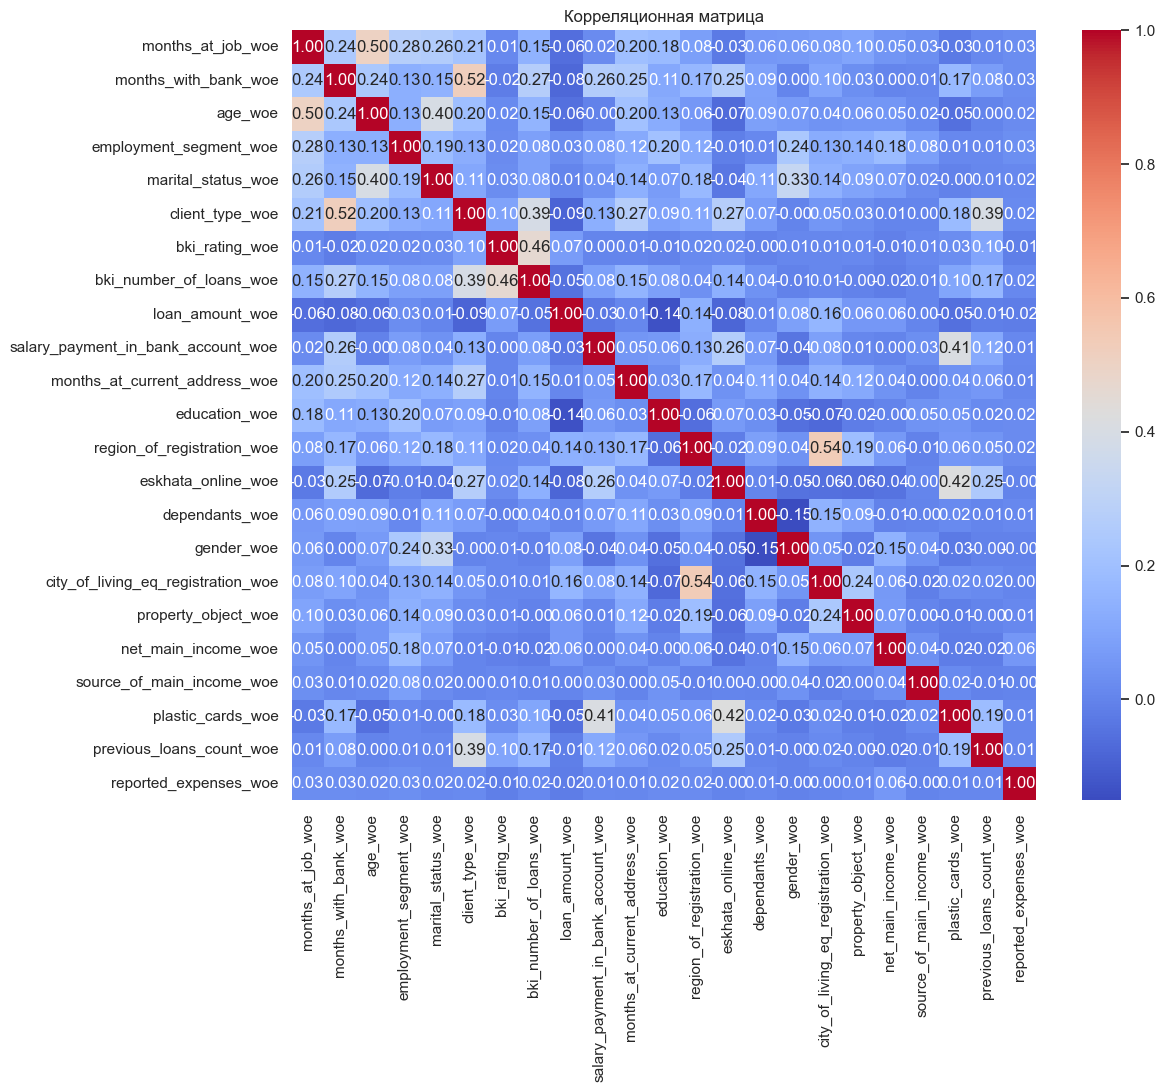

In [96]:
logging.info("Расчет корреляционной матрицы.")
cor_matrix = dev_final_woe[selected_vars_final].corr()

# Сохранение корреляционной матрицы в Excel
cor_matrix.to_excel("employee_corr_matrix.xlsx")

# Визуализация корреляционной матрицы
logging.info("Визуализация корреляционной матрицы.")
plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()


# Пошаговый отбор переменных (Stepwise Selection)

In [97]:
# Функция для пошагового отбора переменных на основе p-значений
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out=0.05, 
                       verbose=True):
    """Пошаговый отбор переменных на основе p-значений."""
    included = list(initial_list)
    while True:
        changed=False
        # Добавление переменной
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            try:
                model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit(disp=0)
                new_pval[new_column] = model.pvalues[new_column]
            except:
                new_pval[new_column] = 1
        if not new_pval.empty:
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print(f'Добавлена переменная {best_feature} с p-value {best_pval}')
        # Удаление переменной
        if len(included) > 0:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=0)
            pvalues = model.pvalues.drop('const')
            worst_pval = pvalues.max()
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print(f'Удалена переменная {worst_feature} с p-value {worst_pval}')
        if not changed:
            break
    return included


# Разделение данных на признаки и целевую переменную

In [98]:
logging.info("Разделение данных на признаки и целевую переменную.")
X_train = train_woe.drop(['gb'], axis=1)
y_train = train_woe['gb']

# Пошаговый отбор переменных на основе p-значений
logging.info("Пошаговый отбор переменных на основе p-значений.")
selected_features_stepwise = stepwise_selection(X_train, y_train)

logging.info(f"Отобранные переменные после пошагового отбора: {selected_features_stepwise}")

2024-12-10 16:48:59,481 - INFO - Разделение данных на признаки и целевую переменную.
2024-12-10 16:48:59,487 - INFO - Пошаговый отбор переменных на основе p-значений.


Добавлена переменная age_woe с p-value 8.275747345179247e-41
Добавлена переменная months_with_bank_woe с p-value 4.822759147932077e-23
Добавлена переменная employment_segment_woe с p-value 3.936953848684782e-19
Добавлена переменная loan_amount_woe с p-value 5.595054336210178e-14
Добавлена переменная bki_rating_woe с p-value 2.8761385550149213e-12
Добавлена переменная months_at_job_woe с p-value 2.8065773671520055e-07
Добавлена переменная education_woe с p-value 0.003987445702832898
Добавлена переменная salary_payment_in_bank_account_woe с p-value 0.011333156905623263
Добавлена переменная reported_expenses_woe с p-value 0.011451418847728689
Добавлена переменная gender_woe с p-value 0.01857250849420057
Добавлена переменная months_at_current_address_woe с p-value 0.031789857414771534


2024-12-10 16:49:06,615 - INFO - Отобранные переменные после пошагового отбора: ['age_woe', 'months_with_bank_woe', 'employment_segment_woe', 'loan_amount_woe', 'bki_rating_woe', 'months_at_job_woe', 'education_woe', 'salary_payment_in_bank_account_woe', 'reported_expenses_woe', 'gender_woe', 'months_at_current_address_woe']


# Настройка модели с отобранными переменными

In [99]:
logging.info("Обучение модели с отобранными переменными.")

# Отобранные признаки
X_train_selected = X_train[selected_features_stepwise]

best_model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Определение сетки гиперпараметров
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Параметр регуляризации
    'penalty': ['l2'],  # Тип регуляризации (L2 для логистической регрессии)
    'solver': ['lbfgs', 'liblinear'],  # Алгоритм оптимизации
    'max_iter': [1000, 1500, 2000],  # Максимальное количество итераций
}

# Инициализация GridSearchCV с использованием кросс-валидации
grid_search = GridSearchCV(estimator=best_model,
                           param_grid=param_grid,
                           scoring=make_scorer(accuracy_score),  # Оценка по точности
                           cv=10,  # Количество фолдов для кросс-валидации
                           verbose=1,  # Логирование прогресса
                           n_jobs=-1)  # Использование всех доступных ядер процессора

# Поиск по сетке гиперпараметров
grid_search.fit(X_train_selected, y_train)

# Лучшие параметры и результат
logging.info(f"Лучшие параметры: {grid_search.best_params_}")
logging.info(f"Лучший результат: {grid_search.best_score_:.4f}")


2024-12-10 16:49:06,634 - INFO - Обучение модели с отобранными переменными.


Fitting 10 folds for each of 36 candidates, totalling 360 fits


2024-12-10 16:49:19,954 - INFO - Лучшие параметры: {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
2024-12-10 16:49:19,954 - INFO - Лучший результат: 0.7057


# Обучение модели с лучшими гиперпараметрами

In [100]:
logging.info("Обучение модели с отобранными переменными.")
# Получение лучшей модели
model_selected = grid_search.best_estimator_

# Обучение лучшей модели
model_selected.fit(X_train_selected, y_train)

# Прогнозирование
# y_pred = best_model.predict(X_test_selected)

# Сохранение лучших гиперпараметров в лог
logging.info(f"Лучшие гиперпараметры: {grid_search.best_params_}")

2024-12-10 16:49:19,970 - INFO - Обучение модели с отобранными переменными.
2024-12-10 16:49:20,006 - INFO - Лучшие гиперпараметры: {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


# Получение коэффициентов логистической регрессии

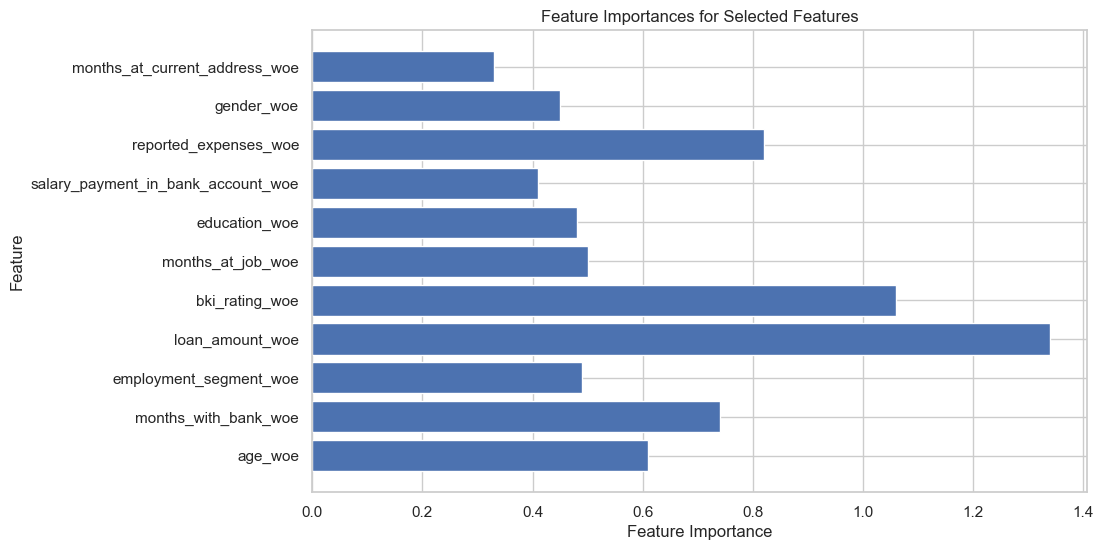

In [101]:
# coef_ содержит коэффициенты для каждого признака

importances = np.round(model_selected.coef_[0], 2)

# Создание DataFrame для вывода важности признаков
df_importances = pd.DataFrame({
    'Feature': X_train_selected.columns,
    'Importance': importances
})

# Сохранение результатов в файл Excel
df_importances.to_excel('feature_importances.xlsx', index=False)

# Построение графика важности признаков
plt.barh(X_train_selected.columns, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Selected Features')
plt.show()

In [102]:
# Вывод коэффициентов модели
logging.info("Коэффициенты модели с отобранными переменными:")
coefficients_selected = pd.DataFrame({
    'Variable': selected_features_stepwise,
    'Coefficient': model_selected.coef_[0]
})
print(coefficients_selected)

2024-12-10 16:49:46,991 - INFO - Коэффициенты модели с отобранными переменными:


                              Variable  Coefficient
0                              age_woe     0.606385
1                 months_with_bank_woe     0.741877
2               employment_segment_woe     0.489091
3                      loan_amount_woe     1.341084
4                       bki_rating_woe     1.061781
5                    months_at_job_woe     0.497948
6                        education_woe     0.475885
7   salary_payment_in_bank_account_woe     0.411423
8                reported_expenses_woe     0.816324
9                           gender_woe     0.445725
10       months_at_current_address_woe     0.329171


# Подготовка данных для предсказания

In [106]:
# Обучение и сохранение scaler и imputer
logging.info("Обучение SimpleImputer и StandardScaler.")
# Обучение импьютера на тренировочных данных
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train_selected)

# Обучение скейлера на импутиванных данных
X_train_imputed = imputer.transform(X_train_selected)
scaler = StandardScaler()
scaler.fit(X_train_imputed)

# Сохранение scaler и imputer
logging.info("Сохранение scaler и imputer на диск.")
joblib.dump(scaler, 'scaler_logres.joblib')
joblib.dump(imputer, 'imputer_logres.joblib')

2024-12-10 16:50:14,484 - INFO - Обучение SimpleImputer и StandardScaler.
2024-12-10 16:50:14,502 - INFO - Сохранение scaler и imputer на диск.


['imputer_logres.joblib']

In [107]:
# Загрузка scaler и imputer
# scaler = joblib.load('scaler.joblib')
# imputer = joblib.load('imputer.joblib')

# Функция для подготовки данных перед предсказанием
def prepare_data(df, bins, selected_features, scaler, imputer):
    """
    Применяет WOE кодирование, обработку пропусков и масштабирование к данным.
    """
    # Применение WOE кодирования
    df_woe = sc.woebin_ply(df, bins)
    
    # Выбор отобранных признаков
    X = df_woe[selected_features]
    
    # Обработка пропусков
    X_imputed = imputer.transform(X)
    
    # Масштабирование
    X_scaled = scaler.transform(X_imputed)
    
    return X_scaled

# Применение функции подготовки данных к различным выборкам

In [108]:
logging.info("Подготовка данных для предсказания на различных подвыборках.")

X_train_selected_scaled = prepare_data(train, bins_final, selected_features_stepwise, scaler, imputer)
y_train_selected = train['gb']

X_test_selected_scaled = prepare_data(test, bins_final, selected_features_stepwise, scaler, imputer)
y_test_selected = test['gb']

X_oot_selected_scaled = prepare_data(oot, bins_final, selected_features_stepwise, scaler, imputer)
y_oot_selected = oot['gb']

X_oot2_selected_scaled = prepare_data(oot2, bins_final, selected_features_stepwise, scaler, imputer)
y_oot2_selected = oot2['gb']

X_dev_final_selected_scaled = prepare_data(dev_final, bins_final, selected_features_stepwise, scaler, imputer)
y_dev_final_selected = dev_final['gb']



2024-12-10 16:50:15,913 - INFO - Подготовка данных для предсказания на различных подвыборках.


[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...


# Предсказания и оценка модели

In [109]:
# Функция для оценки модели
def evaluate_model(y_true, y_pred, y_pred_proba, dataset_name):
    """
    Выводит ROC-AUC, отчет по классификации и матрицу ошибок.
    """
    auc = roc_auc_score(y_true, y_pred_proba)
    logging.info(f"ROC-AUC на {dataset_name} выборке: {auc:.4f}")
    print(f"\nОтчёт по классификации на {dataset_name} выборке:")
    print(classification_report(y_true, y_pred))
    print(f"Матрица ошибок на {dataset_name} выборке:")
    print(confusion_matrix(y_true, y_pred))
    return auc

In [110]:
# Предсказания на различных подвыборках
logging.info("Предсказания на тренировочной выборке.")
train_pred_proba = model_selected.predict_proba(X_train_selected_scaled)[:, 1]
train_pred = model_selected.predict(X_train_selected_scaled)

logging.info("Предсказания на тестовой выборке (out-of-sample).")
test_pred_proba = model_selected.predict_proba(X_test_selected_scaled)[:, 1]
test_pred = model_selected.predict(X_test_selected_scaled)

logging.info("Предсказания на out-of-time выборке.")
oot_pred_proba = model_selected.predict_proba(X_oot_selected_scaled)[:, 1]
oot_pred = model_selected.predict(X_oot_selected_scaled)

logging.info("Предсказания на out-of-time 2 выборке.")
oot2_pred_proba = model_selected.predict_proba(X_oot2_selected_scaled)[:, 1]
oot2_pred = model_selected.predict(X_oot2_selected_scaled)

logging.info("Предсказания на Development Final выборке.")
dev_final_pred_proba = model_selected.predict_proba(X_dev_final_selected_scaled)[:, 1]
dev_final_pred = model_selected.predict(X_dev_final_selected_scaled)


2024-12-10 16:50:26,443 - INFO - Предсказания на тренировочной выборке.
2024-12-10 16:50:26,447 - INFO - Предсказания на тестовой выборке (out-of-sample).
2024-12-10 16:50:26,451 - INFO - Предсказания на out-of-time выборке.
2024-12-10 16:50:26,454 - INFO - Предсказания на out-of-time 2 выборке.
2024-12-10 16:50:26,457 - INFO - Предсказания на Development Final выборке.


# Оценка модели на различных подвыборках

In [111]:
auc_train = evaluate_model(y_train_selected, train_pred, train_pred_proba, "тренировочной")
auc_test = evaluate_model(y_test_selected, test_pred, test_pred_proba, "тестовой (out-of-sample)")
auc_oot = evaluate_model(y_oot_selected, oot_pred, oot_pred_proba, "out-of-time")
auc_oot2 = evaluate_model(y_oot2_selected, oot2_pred, oot2_pred_proba, "out-of-time 2")
auc_dev_final = evaluate_model(y_dev_final_selected, dev_final_pred, dev_final_pred_proba, "Development Final")


2024-12-10 16:50:26,493 - INFO - ROC-AUC на тренировочной выборке: 0.7932
2024-12-10 16:50:26,539 - INFO - ROC-AUC на тестовой (out-of-sample) выборке: 0.7691
2024-12-10 16:50:26,568 - INFO - ROC-AUC на out-of-time выборке: 0.7726
2024-12-10 16:50:26,593 - INFO - ROC-AUC на out-of-time 2 выборке: 0.8009
2024-12-10 16:50:26,625 - INFO - ROC-AUC на Development Final выборке: 0.7852



Отчёт по классификации на тренировочной выборке:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67     24768
           1       0.03      0.90      0.06       448

    accuracy                           0.51     25216
   macro avg       0.51      0.70      0.36     25216
weighted avg       0.98      0.51      0.65     25216

Матрица ошибок на тренировочной выборке:
[[12373 12395]
 [   43   405]]

Отчёт по классификации на тестовой (out-of-sample) выборке:
              precision    recall  f1-score   support

           0       0.99      0.49      0.66     12199
           1       0.03      0.86      0.06       221

    accuracy                           0.50     12420
   macro avg       0.51      0.68      0.36     12420
weighted avg       0.98      0.50      0.65     12420

Матрица ошибок на тестовой (out-of-sample) выборке:
[[6027 6172]
 [  31  190]]

Отчёт по классификации на out-of-time выборке:
              precision    recall  f

In [112]:
# Check model performance 
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score,   
                             precision_score, f1_score, recall_score)  
from scipy.stats import ks_2samp  # Importing ks_2samp  

# Initialize a dictionary to hold all metrics  
metrics = {  
    'Dataset': [],  
    'Accuracy': [],  
    'Confusion Matrix': [],  
    'ROC AUC': [],  
    'Gini': [],  
    'KS Statistic': [],  
    'Precision': [],  
    'Recall': [],  
    'F1 Score': [],  
}  

def calculate_ks(y_true, y_scores):  
    # Calculate the KS statistic using ks_2samp  
    return ks_2samp(y_scores[y_true == 1], y_scores[y_true == 0]).statistic  

def calculate_metrics(model, X, y, dataset_name):  
    # Predictions and probabilities  
    y_pred = model.predict(X)  
    y_pred_proba = model.predict_proba(X)[:, 1]  

    # Calculate metrics  
    accuracy = accuracy_score(y, y_pred)  
    conf_matrix = confusion_matrix(y, y_pred)  
    precision = precision_score(y, y_pred, zero_division=0)  
    recall = recall_score(y, y_pred, zero_division=0)  
    f1 = f1_score(y, y_pred, zero_division=0)  
    roc_auc = roc_auc_score(y, y_pred_proba)  
    gini = 2 * roc_auc - 1  
    ks = calculate_ks(y, y_pred_proba)  

    # Append metrics to the dictionary  
    metrics['Dataset'].append(dataset_name)  
    metrics['Accuracy'].append(accuracy)  
    metrics['Confusion Matrix'].append(conf_matrix)  
    metrics['ROC AUC'].append(roc_auc)  
    metrics['Gini'].append(gini)  
    metrics['KS Statistic'].append(ks)  
    metrics['Precision'].append(precision) 
    metrics['Recall'].append(recall)  
    metrics['F1 Score'].append(f1)  
    
    
def return_conf_matrix(model, X, y, dataset_name):
    y_pred = model.predict(X)  
    y_pred_proba = model.predict_proba(X)[:, 1]  
    
    conf_matrix = confusion_matrix(y, y_pred)  

    return conf_matrix

# Call the function for each dataset  
calculate_metrics(model_selected, X_train_selected_scaled, y_train_selected, 'TRAIN')  
calculate_metrics(model_selected, X_test_selected_scaled, y_test_selected, 'TEST')  
calculate_metrics(model_selected, X_oot_selected_scaled, y_oot_selected, 'OOT')  
calculate_metrics(model_selected, X_oot2_selected_scaled, y_oot2_selected, 'OOT2')  
calculate_metrics(model_selected, X_dev_final_selected_scaled, y_dev_final_selected, 'FULL')  

# Create DataFrame from metrics  
metrics_df = pd.DataFrame(metrics)  

# Display the DataFrame  
metrics_df

,Dataset,Accuracy,Confusion Matrix,ROC AUC,Gini,KS Statistic,Precision,Recall,F1 Score
0,TRAIN,0.506742,"[[12373, 12395], [43, 405]]",0.793205,0.586410,0.445667,0.031641,0.904018,0.061141
1,TEST,0.500564,"[[6027, 6172], [31, 190]]",0.769074,0.538147,0.402579,0.029865,0.859729,0.057724
2,OOT,0.518143,"[[6369, 5980], [9, 71]]",0.772646,0.545292,0.443865,0.011734,0.887500,0.023161
3,OOT2,0.471726,"[[4282, 4934], [8, 131]]",0.800926,0.601853,0.476296,0.025864,0.942446,0.050346
4,FULL,0.504703,"[[18400, 18567], [74, 595]]",0.785230,0.570459,0.428999,0.031051,0.889387,0.060007


In [113]:
print('TRAIN')
print(return_conf_matrix(model_selected, X_train_selected_scaled, y_train_selected, 'TRAIN'))  

print('TEST')
print(return_conf_matrix(model_selected, X_test_selected_scaled, y_test_selected, 'TEST'))  

print('OOT')
print(return_conf_matrix(model_selected, X_oot_selected_scaled, y_oot_selected, 'OOT'))

print('OOT2')
print(return_conf_matrix(model_selected, X_oot2_selected_scaled, y_oot2_selected, 'OOT2'))

print('FULL')
print(return_conf_matrix(model_selected, X_dev_final_selected_scaled, y_dev_final_selected, 'FULL'))

TRAIN
[[12373 12395]
 [   43   405]]
TEST
[[6027 6172]
 [  31  190]]
OOT
[[6369 5980]
 [   9   71]]
OOT2
[[4282 4934]
 [   8  131]]
FULL
[[18400 18567]
 [   74   595]]


# Визуализация ROC-кривых

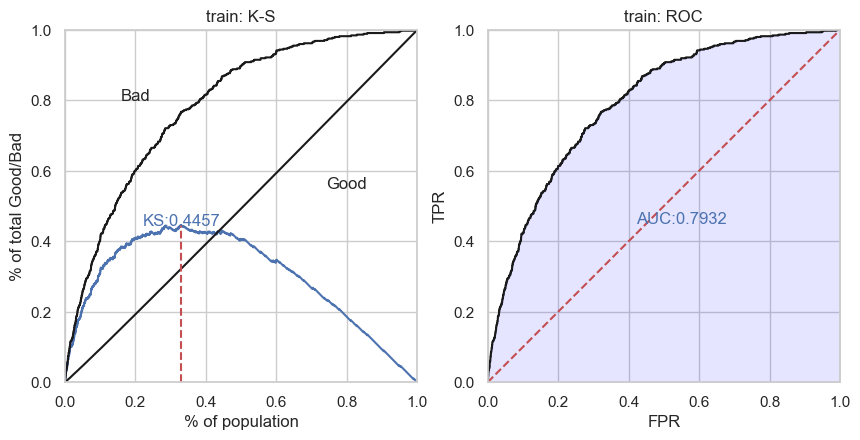

{'KS': 0.4457, 'AUC': 0.7932, 'Gini': 0.5864, 'pic': <Figure size 1000x600 with 2 Axes>}


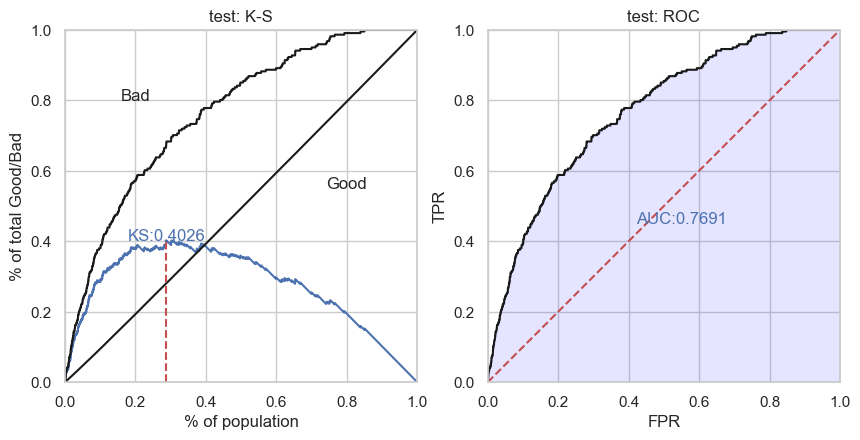

{'KS': 0.4026, 'AUC': 0.7691, 'Gini': 0.5381, 'pic': <Figure size 1000x600 with 2 Axes>}


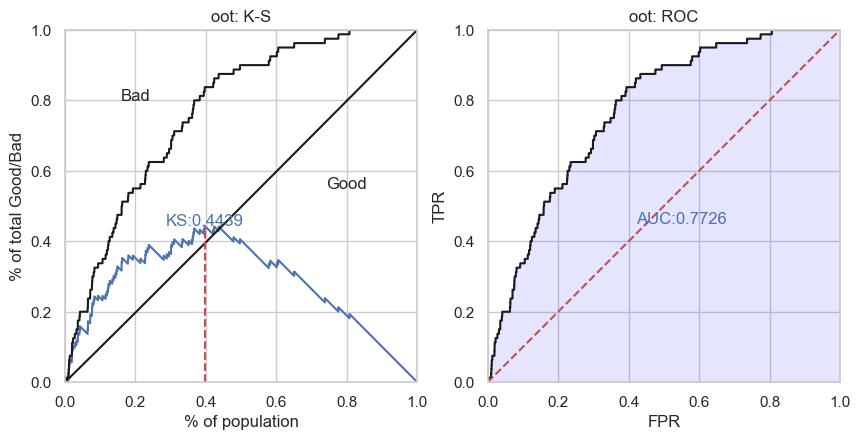

{'KS': 0.4439, 'AUC': 0.7726, 'Gini': 0.5453, 'pic': <Figure size 1000x600 with 2 Axes>}


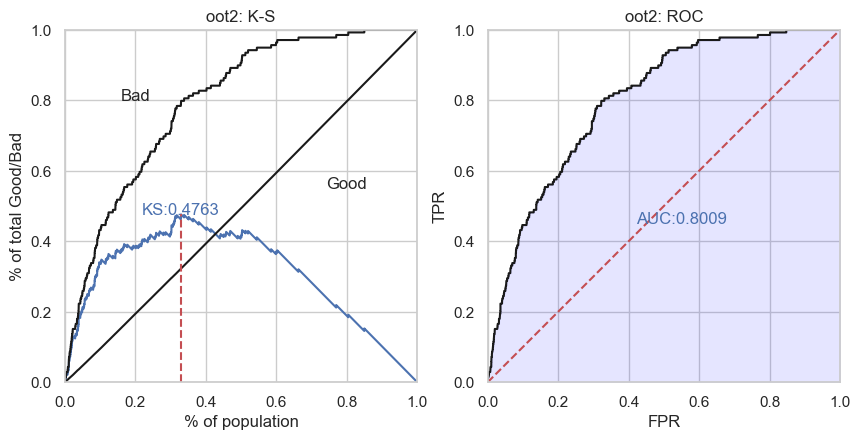

{'KS': 0.4763, 'AUC': 0.8009, 'Gini': 0.6019, 'pic': <Figure size 1000x600 with 2 Axes>}


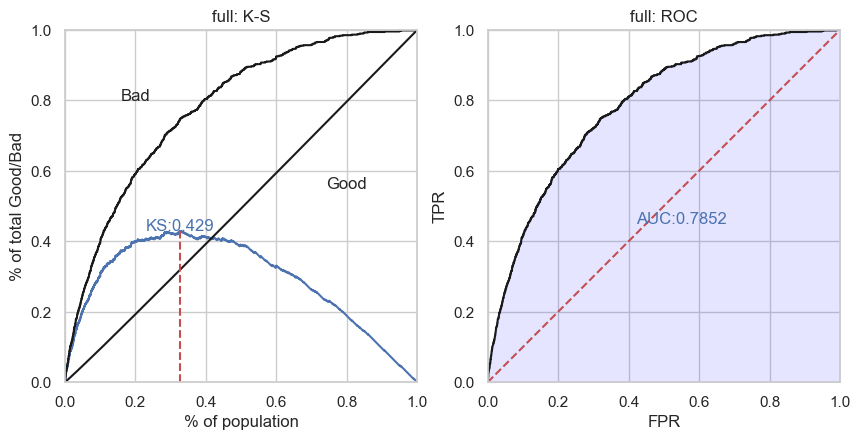

{'KS': 0.429, 'AUC': 0.7852, 'Gini': 0.5705, 'pic': <Figure size 1000x600 with 2 Axes>}


In [114]:
print(sc.perf_eva(y_train_selected, model_selected.predict_log_proba(X_train_selected_scaled)[:, 0], title = "train"))
print(sc.perf_eva(y_test_selected, model_selected.predict_log_proba(X_test_selected_scaled)[:, 0], title = "test"))
print(sc.perf_eva(y_oot_selected, model_selected.predict_log_proba(X_oot_selected_scaled)[:, 0], title = "oot"))
print(sc.perf_eva(y_oot2_selected, model_selected.predict_log_proba(X_oot2_selected_scaled)[:, 0], title = "oot2"))
print(sc.perf_eva(y_dev_final_selected, model_selected.predict_log_proba(X_dev_final_selected_scaled)[:, 0], title = "full"))

In [104]:
# pip install -r requirements.txt

In [115]:
pip list


Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
alabaster                     0.7.12
anaconda-client               1.11.1
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         23.2.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary